In [1]:
# Import dependency
import os
import numpy as np
from PIL import Image
import hashlib
import time
import random as rnd
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.fftpack import dct
from scipy.signal import get_window
from scipy.fft import fft
from scipy import ndimage
from scipy.ndimage import gaussian_filter
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from collections import Counter

In [120]:
imgPath = 'Datasets/MLA2_DATA/IMAGE'
imgFiles = os.listdir(imgPath)


audPath = 'Datasets/MLA2_DATA/AUDIO'
audioFiles = os.listdir(audPath)

In [119]:
def genRandom(seed=None, noBytes=None, fromVal=0, toVal=799):
    time.sleep(0.5)
    if seed == None:
        seed = int(time.time_ns())
        
        
    state = seed.to_bytes(32, 'big')

    def _sha256(data):
        return hashlib.sha256(data).digest()

    if noBytes is not None:
        result = b''
        while len(result) < noBytes:
            state = _sha256(state)
            result += state
        return result[:noBytes]
    
    if fromVal is not None and toVal is not None:
        rand_bytes = genRandom(seed, 4)  # Generate 4 random bytes
        rand_int = int.from_bytes(rand_bytes, 'big')
        return fromVal + (rand_int % (toVal - fromVal + 1))

### ***Beginner***

**1. Data pre-processing makes the data suitable for the algorithms/models to work on, perform on randomly
selected 4 data samples:**
> (a) *Image Dataset: Load image using PIL, convert grayscale, normalize image data between
[−1,1] and plot color vs grayscale image, unnormalized vs normalized image.*

> (b) *Audio Dataset: Load audio using Scipy, normalize audio data between [−1,1] and plot
unnormalized vs normalized audio.*

['Datasets/MLA2_DATA/IMAGE\\charles_montgomery_burns\\pic_0424.jpg', 'Datasets/MLA2_DATA/IMAGE\\moe_szyslak\\pic_0766.jpg', 'Datasets/MLA2_DATA/IMAGE\\principal_skinner\\pic_0948.jpg', 'Datasets/MLA2_DATA/IMAGE\\marge_simpson\\pic_0594.jpg']


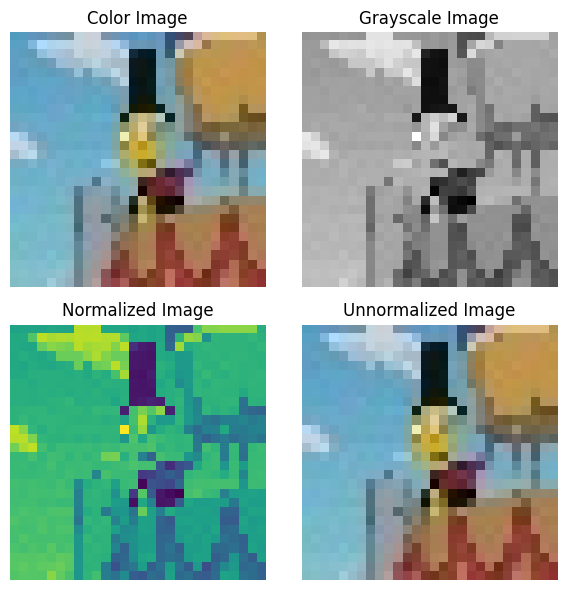

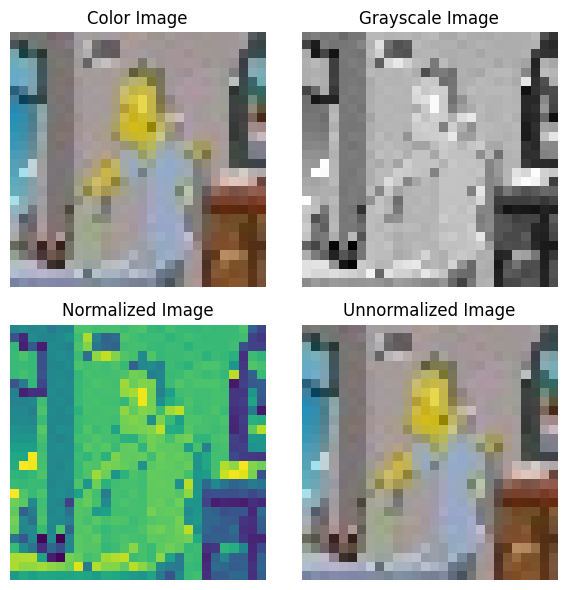

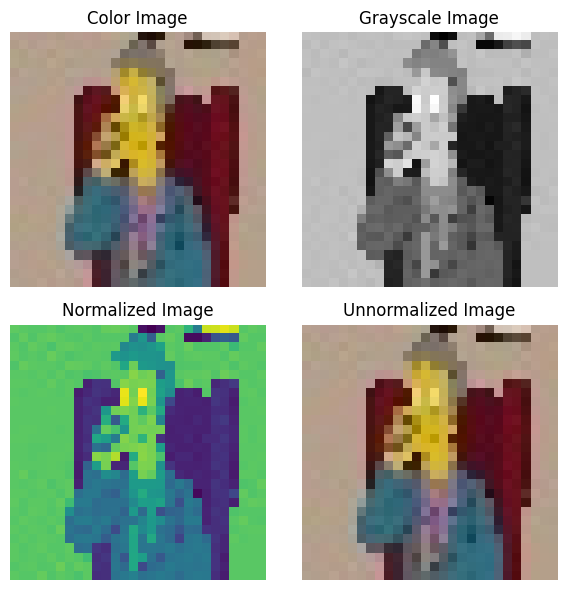

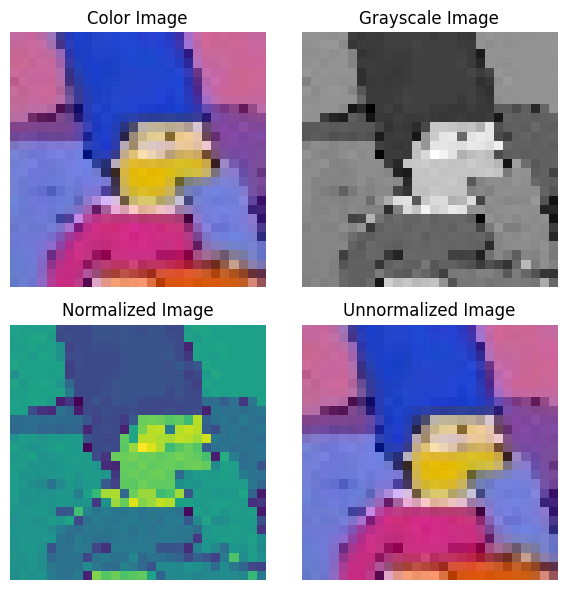

In [123]:
# # a)

# # Load Data Images
# rnd_list = [os.path.join(imgPath, imgFiles[rnd.randint(0, len(imgFiles)-1)])  for _ in range(4)]
# selRandImg = [os.path.join(i, os.listdir(i)[genRandom()]) for i in rnd_list]
# load_images = [Image.open(img) for img in selRandImg]
# print(selRandImg)
# # # Fetch Four sample from every class 
# # for imgClass in os.listdir(imgPath):
# #     classPath = os.path.join(imgPath, imgClass)
# #     classImgList = [os.path.join(classPath, img) for img in os.listdir(classPath)]
# #     classLoadImage = []
# #     for i in rnd_list:
# #         classLoadImage.append(Image.open(classImgList[i]))
# #     load_images.append(classLoadImage)

# # Convert to Grayscale Images
# grayScaleImages = [img.convert('L') for img in load_images]
# # print(grayScaleImages)

# # # Convert GrayScale Four sample from every class
# # for class_images in load_images:
# #     grayClassImage = []
# #     for img in class_images:
# #         grayClassImage.append(img.convert('L'))
# #     grayScaleImages.append(grayClassImage)
    

# def minMaxNormalization(actualData, xtoy):
#     x, y = xtoy # if xtoy = (-1, 1) -> x = -1,  y = 1
#     minD = np.min(actualData)
#     maxD = np.max(actualData)
    
#     normalizeData = x + (y - x) * ((actualData - minD) / (maxD - minD))
#     return normalizeData

# # Normalize the Images
# normalizeImages = [minMaxNormalization(np.asarray(img, dtype=np.float32), (-1, 1)) for img in load_images]
# # print(normalizeImages)

# # # Normalized Four sample from every class
# # for class_images in load_images:
# #     normImg = []
# #     for img in class_images:
# #         imgArray = np.asarray(img, dtype=np.float32)
# #         imgArray = minMaxNormalization(imgArray, (-1, 1))
# #         normImg.append(imgArray)
# #     normalizeImages.append(normImg)
    
# # Plot GrayScale Image and Color Image
# # Plot Normalized Image and Unnormalized Image
# def plotImages(axis, img, title, fontSize=12, cmap=None):
#     axis.imshow(img, cmap=cmap)
#     axis.set_title(title, fontsize=fontSize)
#     axis.axis('off')

# # # Plot random Sample from Every Class
# # for coIm, grIm, noIm, nnIm in zip(load_images, grayScaleImages, normalizeImages, load_images):
# #     for cI, gI, nI, nnI in zip(coIm, grIm, noIm, nnIm):
# #         fig, ((axis_1, axis_2), (axis_3, axis_4)) = plt.subplots(nrows=2, ncols=2, figsize=(6, 6))
        
# #         plotImages(axis_1, cI, "Color Image")
# #         plotImages(axis_2, gI, "Grayscale Image", cmap="gray")
# #         plotImages(axis_3, nI, "Normalized Image")
# #         plotImages(axis_4, np.asarray(nnI), "Unnormalized Image")
        
# #         plt.tight_layout()
# #         plt.show()

# for coIm, grIm, noIm, nnIm in zip(load_images, grayScaleImages, normalizeImages, load_images):
#     fig, ((axis_1, axis_2), (axis_3, axis_4)) = plt.subplots(nrows=2, ncols=2, figsize=(6, 6))
        
#     plotImages(axis_1, coIm, "Color Image")
#     plotImages(axis_2, grIm, "Grayscale Image", cmap="gray")
#     plotImages(axis_3, noIm, "Normalized Image")
#     plotImages(axis_4, np.asarray(nnIm), "Unnormalized Image")
        
#     plt.tight_layout()
#     plt.show()


# from PIL import Image
# import numpy as np
# import os
# import matplotlib.pyplot as plt

# # Function to plot images
# def plotImages(axis, img, title, fontSize=12, cmap=None):
#     axis.imshow(img, cmap=cmap)
#     axis.set_title(title, fontsize=fontSize)
#     axis.axis('off')

# # Function for Min-Max Normalization
# def minMaxNormalization(actualData, xtoy):
#     x, y = xtoy # if xtoy = (-1, 1) -> x = -1, y = 1
#     minD = np.min(actualData)
#     maxD = np.max(actualData)
#     normalizeData = x + (y - x) * ((actualData - minD) / (maxD - minD))
#     return normalizeData

# # Load Random Images
# rnd_list = [os.path.join(imgPath, imgFiles[genRandom(seed=j, fromVal=0, toVal=len(imgFiles)-1)]) for j in range(4)]
# selRandImg = [os.path.join(i, os.listdir(i)[genRandom(fromVal=0, toVal=len(os.listdir(i))-1)]) for i in rnd_list]
# load_images = [Image.open(img) for img in selRandImg]
# print(selRandImg)

# # Convert to Grayscale Images
# grayScaleImages = [img.convert('L') for img in load_images]


# normalizeImages = []
# for img in grayScaleImages:
#     img_data = np.array(img.getdata(), dtype=np.float32).reshape(img.size[1], img.size[0])
#     norm_img = minMaxNormalization(img_data, (-1, 1))
#     normalizeImages.append(norm_img)

# # Plot the images: Color Image, Grayscale Image, Normalized Image, Unnormalized Image
# for coIm, grIm, noIm, nnIm in zip(load_images, grayScaleImages, normalizeImages, load_images):
#     fig, ((axis_1, axis_2), (axis_3, axis_4)) = plt.subplots(nrows=2, ncols=2, figsize=(6, 6))
        
#     plotImages(axis_1, coIm, "Color Image")
#     plotImages(axis_2, grIm, "Grayscale Image", cmap="gray")
#     plotImages(axis_3, noIm, "Normalized Image")
#     plotImages(axis_4, np.asarray(nnIm), "Unnormalized Image")
        
#     plt.tight_layout()
#     plt.show()
from PIL import Image
import os
import matplotlib.pyplot as plt
import random






In [ ]:
def plotImageAndHist(axis_img, axis_hist, img, title, fontSize=12, cmap=None):
    axis_img.imshow(img, cmap=cmap)
    axis_img.set_title(title, fontsize=fontSize)
    axis_img.axis('off')

    axis_hist.hist(np.asarray(img).ravel(), bins=256, alpha=0.7)
    axis_hist.set_title(f"{title} Histogram", fontsize=fontSize)
    axis_hist.set_xlim([np.min(img), np.max(img)])  # Set limits according to the image range

# # Plot images with their histograms
# for coIm, grIm, noIm, nnIm in zip(load_images, grayScaleImages, normalizeImages, load_images):
#     for cI, gI, nI, nnI in zip(coIm, grIm, noIm, nnIm):
#         fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 10))
#         plotImageAndHist(axes[0, 0], axes[0, 1], cI, "Color Image")
#         plotImageAndHist(axes[1, 0], axes[1, 1], gI, "Grayscale Image", cmap="gray")
#         plotImageAndHist(axes[2, 0], axes[2, 1], nI, "Normalized Image")
#         plotImageAndHist(axes[3, 0], axes[3, 1], np.asarray(nnI), "Original Image (Unnormalized)", cmap="gray")
        
#         plt.tight_layout()
#         plt.show()


for cI, gI, nI, nnI in zip(load_images, grayScaleImages, normalizeImages, load_images):
    fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 10))
    plotImageAndHist(axes[0, 0], axes[0, 1], cI, "Color Image")
    plotImageAndHist(axes[1, 0], axes[1, 1], gI, "Grayscale Image", cmap="gray")
    plotImageAndHist(axes[2, 0], axes[2, 1], nI, "Normalized Image")
    plotImageAndHist(axes[3, 0], axes[3, 1], np.asarray(nnI), "Original Image (Unnormalized)", cmap="gray")
    
    plt.tight_layout()
    plt.show()


In [ ]:
# b)
rndChosen = [genRandom(seed=i, fromVal=0, toVal=len(audioFiles) - 1) for i in range(4)]

# Load Audio Files
audioLoadData = []
for i in rndChosen:
    sr, audio = wavfile.read(os.path.join(audPath, audioFiles[i]))
    audioLoadData.append((sr, audio))

# Normalized Audio file data
def minMaxNormalization(actualData, xtoy):
    x, y = xtoy # if xtoy = (-1, 1) -> x = -1,  y = 1
    actualData = [float(value) for value in actualData]
    minD = np.min(actualData)
    maxD = np.max(actualData)
    
    normalizeData = x + (y - x) * ((actualData - minD) / (maxD - minD))
    return normalizeData

audioNormalizeData = []
for sr, audio in audioLoadData:
    audioNormalizeData.append(minMaxNormalization(audio, (-1, 1)))

# Plot Normalized and Unnormalized audio file data 
for i in range(4):
    unnormalized_audio = audioLoadData[i][1]
    normalized_audio = audioNormalizeData[i]

    time_axis = np.linspace(0, len(unnormalized_audio) / audioLoadData[i][0], num=len(unnormalized_audio))

    plt.figure(figsize=(14, 6))

    plt.subplot(2, 1, 1)
    plt.plot(time_axis, unnormalized_audio, label="Unnormalized Audio", color='blue')
    plt.title('Unnormalized Audio Signal')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')

    plt.subplot(2, 1, 2)
    plt.plot(time_axis, normalized_audio, label="Normalized Audio (-1, 1)", color='green')
    plt.title('Normalized Audio Signal')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude (Normalized)')

    plt.tight_layout()
    plt.show()

**2. Sampling is a process of selecting data samples in a specific order. Implement these sampling strategies.**
> (a) *Sequential Sampler: Define a order based on number of samples in each class, if number of samples are same rearrange the order based on classes alphabetically. Implement a sampler to select data in this pre-defined order and run the sampler to select and print complete data in the sampled manner.*

> (b) *Weighted Random Sampler: Give weight to each class based on there similarity and implement a sampler which selects classes which are least similar. Make sure sampler do not have information about similarity of classes and run the sampler to select and print complete data in the sampled manner.*
> - Image Similarity: Cosine Similarity of GrayScale Histogram.
> - Audio Similarity: Cosine Similarity of Loudness of signal
> - Text Similarity: Cosine Similarity of tokenized sentence vector.

> (c) *Distributed Sampler: Split the dataset in n sets randomly based on classes and implement a single sampler to sample from these sets. Make sure sampler do not have information about the data in differnet sets and run the sampler to select and print complete data in the sampled manner.*

In [124]:
# Sequential Sampler
def seqSampler(clsSample):
    samples = [(value, key) for key, value in clsSample.items()]

    def mergeSort(samples):
        if len(samples) <= 1:
            return samples

        mid = len(samples) // 2
        leftH = mergeSort(samples[:mid])
        rightH = mergeSort(samples[mid:])

        return combine(leftH, rightH)

    def combine(left, right):
        sortedSamples = []
        i = j = 0

        while i < len(left) and j < len(right):
            if (-left[i][0], left[i][1]) < (-right[j][0], right[j][1]):
                sortedSamples.append(left[i])
                i += 1
            else:
                sortedSamples.append(right[j])
                j += 1

        sortedSamples.extend(left[i:])
        sortedSamples.extend(right[j:])
        return sortedSamples
    
    return mergeSort(samples)

# Weighted Random Sampler
def weightedRandSampler():
    pass


# Distributed Sampler
def distSamplers(datasets, samples, dtType, noSets=5):
    listOfSets = []
    if dtType == 'image':
        for i in range(noSets):
            dictDistSamp = {}
            for key in samples:
                tempPath = os.path.join(datasets, key)
                dictDistSamp[key] = os.path.join(tempPath, os.listdir(tempPath)[i])
            listOfSets.append(dictDistSamp)
    
    elif dtType == 'audio':
        for i in range(noSets):
            dictDistSamp = {}
            for key in samples:
                audio_files = [f for f in os.listdir(datasets) if f.split('_')[-1].split('.')[0]==key]
                if i < len(audio_files):
                    dictDistSamp[key] = os.path.join(datasets, audio_files[i])
            listOfSets.append(dictDistSamp)
    
    return listOfSets

def samplerStrategy(noSamples, datasets, datasetType, samplerStrategy):
    if datasetType=='audio':
        listSamples = os.listdir(datasets)
        clsNames = [file.split('_')[-1].split('.')[0] for file in listSamples]
        clsCounts = dict(Counter(clsNames))
        # print(clsCounts)
    
    elif datasetType=='image':
        clsNames = os.listdir(datasets)
        clsCounts = {}
        for ls in clsNames:
            clsCounts[ls] = len(os.listdir(os.path.join(datasets, ls)))
        # print(clsCounts)
    
    else:
        print("Please Enter Valid Dataset types.")
        return
    
    if samplerStrategy.lower() == 'sequence':
        samImg = []
        seqSam = seqSampler(clsSample=clsCounts)
        for i in range(noSamples):
            samImgDict = {}
            for tp in seqSam:
                _, dataCls = tp
                if datasetType == 'image':
                    tempPath = os.path.join(datasets, dataCls)
                    samImgDict[dataCls] = os.path.join(tempPath, os.listdir(tempPath)[i])
                else:
                    audFiles = [f for f in os.listdir(datasets) if f.split('_')[-1].split('.')[0]==dataCls]
                    samImgDict[dataCls] = os.path.join(datasets, audFiles[i])
            samImg.append(samImgDict)
        return samImg
    
    elif samplerStrategy.lower() == 'distributed':
        return distSamplers(datasets=datasets, samples=clsCounts, dtType=datasetType, noSets=5)
    
    elif samplerStrategy.lower() == 'weighted':
        return weightedRandSampler()

# smp = samplerStrategy(5, audPath, 'audio', 'sequence')
# print(smp)
samplerStrategy(5, audPath, 'audio', 'sequence')

[{'laughter': 'Datasets/MLA2_DATA/AUDIO\\f0003_0_laughter.wav',
  'sneeze': 'Datasets/MLA2_DATA/AUDIO\\f0003_0_sneeze.wav',
  'sigh': 'Datasets/MLA2_DATA/AUDIO\\f0003_0_sigh.wav',
  'cough': 'Datasets/MLA2_DATA/AUDIO\\f0004_0_cough.wav',
  'sniff': 'Datasets/MLA2_DATA/AUDIO\\f0003_0_sniff.wav',
  'throatclearing': 'Datasets/MLA2_DATA/AUDIO\\f0004_0_throatclearing.wav'},
 {'laughter': 'Datasets/MLA2_DATA/AUDIO\\f0004_0_laughter.wav',
  'sneeze': 'Datasets/MLA2_DATA/AUDIO\\f0004_0_sneeze.wav',
  'sigh': 'Datasets/MLA2_DATA/AUDIO\\f0007_0_sigh.wav',
  'cough': 'Datasets/MLA2_DATA/AUDIO\\f0007_0_cough.wav',
  'sniff': 'Datasets/MLA2_DATA/AUDIO\\f0004_0_sniff.wav',
  'throatclearing': 'Datasets/MLA2_DATA/AUDIO\\f0007_0_throatclearing.wav'},
 {'laughter': 'Datasets/MLA2_DATA/AUDIO\\f0007_0_laughter.wav',
  'sneeze': 'Datasets/MLA2_DATA/AUDIO\\f0007_0_sneeze.wav',
  'sigh': 'Datasets/MLA2_DATA/AUDIO\\f0008_0_sigh.wav',
  'cough': 'Datasets/MLA2_DATA/AUDIO\\f0008_0_cough.wav',
  'sniff': 'Data

In [153]:
# Sequential Sampler
def seqSampler(clsSample):
    samples = [(value, key) for key, value in clsSample.items()]

    def mergeSort(samples):
        if len(samples) <= 1:
            return samples

        mid = len(samples) // 2
        leftH = mergeSort(samples[:mid])
        rightH = mergeSort(samples[mid:])

        return combine(leftH, rightH)

    def combine(left, right):
        sortedSamples = []
        i = j = 0

        while i < len(left) and j < len(right):
            if (-left[i][0], left[i][1]) < (-right[j][0], right[j][1]):
                sortedSamples.append(left[i])
                i += 1
            else:
                sortedSamples.append(right[j])
                j += 1

        sortedSamples.extend(left[i:])
        sortedSamples.extend(right[j:])
        return sortedSamples
    
    return mergeSort(samples)

# Weighted Random Sampler
def weightedRandSampler():
    pass

# Distributed Sampler
def distSamplers(datasets, samples, dtType, noSets=5):
    listOfSets = []
    dataset_handlers = {
        'image': lambda key: os.path.join(datasets, key),
        'audio': lambda key: [f for f in os.listdir(datasets) if f.split('_')[-1].split('.')[0]==key]
    }
    handler = dataset_handlers.get(dtType)
    if handler:
        for i in range(noSets):
            dictDistSamp = {}
            for key in samples:
                if dtType == 'image':
                    tempPath = handler(key)
                    dictDistSamp[key] = os.path.join(tempPath, os.listdir(tempPath)[i])
                else:
                    audio_files = handler(key)
                    if i < len(audio_files):
                        dictDistSamp[key] = os.path.join(datasets, audio_files[i])
            listOfSets.append(dictDistSamp)
    return listOfSets

def samplerStrategy(noSamples, datasets, datasetType, samplerStrategy):
    dataset_handlers = {
        'audio': lambda datasets: os.listdir(datasets),
        'image': lambda datasets: os.listdir(datasets)
    }
    handler = dataset_handlers.get(datasetType)
    if handler:
        listSamples = handler(datasets)
        clsNames = list(map(lambda file: file.split('_')[-1].split('.')[0] if datasetType == 'audio' else file, listSamples))
        clsCounts = dict(Counter(clsNames))
    
    sampler_strategies = {
        'sequence': lambda clsCounts, noSamples, datasets, datasetType: [
            {dataCls: os.path.join(datasets, dataCls, os.listdir(os.path.join(datasets, dataCls))[i]) if datasetType == 'image' else os.path.join(datasets, [f for f in os.listdir(datasets) if f.split('_')[-1].split('.')[0]==dataCls][i]) for _, dataCls in seqSampler(clsCounts)[i:i+1]}
            for i in range(noSamples)
        ],
        'distributed': lambda clsCounts, noSamples, datasets, datasetType: distSamplers(datasets, clsCounts, datasetType, noSets=5),
        'weighted': lambda clsCounts, noSamples, datasets, datasetType: weightedRandSampler()
    }
    handler = sampler_strategies.get(samplerStrategy.lower())
    if handler:
        return handler(clsCounts, noSamples, datasets, datasetType)

# smp = samplerStrategy(5, audPath, 'audio', 'sequence')
# print(smp)
samplerStrategy(20, audPath, 'image', 'sequence')

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'Datasets/MLA2_DATA/AUDIO\\laughter'

**3. Randomly select two samples from data and implement mentioned feature extraction techniques on given datasets. (You have to only use scipy, matplotlib for this question.)**
> (a) *Image Data: Features from accelerated segment test (FAST), Scale-Invariant Feature transform (SIFT)*

> (b) *Audio Data: Mel-Frequency Cepstral Coefficients (MFCC), Linear-Frequency Cepstral Coefficients (LFCC)*

> (c) *Text Data: Term Frequency-Inverse Document Frequency (TF-IDF) Plot all features of all modality for selected samples*


In [141]:
rndImageFiles = [os.path.join(imgPath, imgFiles[rnd.randint(0, len(imgFiles) - 1)]) for _ in range(2)]
rndImages = [os.path.join(imP, os.listdir(imP)[rnd.randint(0, len(os.listdir(imP)) - 1)]) for imP in rndImageFiles]
rndAudio = [os.path.join(audPath, audioFiles[rnd.randint(0, len(audioFiles) - 1)]) for _ in range(2)]
imgArray = [np.asarray(Image.open(img)) for img in rndImages]
# imgArray

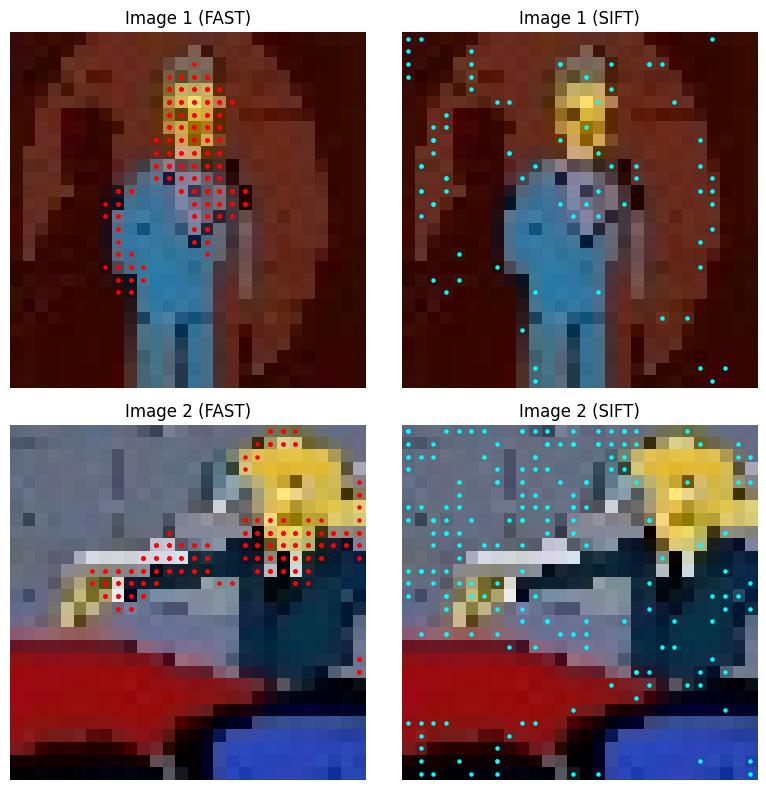

In [144]:
# a) Image Data

def plotImages(axis, img, title, fontSize=12, cmap=None):
    axis.imshow(img, cmap=cmap)
    axis.set_title(title, fontsize=fontSize)
    axis.axis('off')


# FAST Feature Extraction by using HCD(Harris Corner Detection) by using Guassian filter, gradients 
def HCD(imag, thVal=90):
    grdX = np.gradient(imag, axis=0)
    grdY = np.gradient(imag, axis=1)

    xSquare = gaussian_filter(grdX**2, sigma=1)
    ySquare = gaussian_filter(grdY**2, sigma=1)
    xIntoY  = gaussian_filter(grdY * grdX, sigma=1)

    detMatr = xSquare * ySquare - (xIntoY ** 2)
    tracMatr = xSquare + ySquare

    hcdConst = 0.05
    hcdResp = detMatr - hcdConst * (tracMatr ** 2)
    
    # find corner points
    thresValue = np.percentile(hcdResp, thVal)
    cornersPoints = np.argwhere(hcdResp > thresValue)
    return cornersPoints


# SIFT using Difference of Gaussians
def DOG(imag, thVal=95): 
    sigVals = [(.5, 1), (1, 1.5), (1.5, 2)]
    cornerPoints = []  
    
    for sig1, sig2 in sigVals:
        guaImg1 = gaussian_filter(imag, sigma=sig1)
        guaImg2 = gaussian_filter(imag, sigma=sig2)       
        difGuassian = guaImg1 - guaImg2
        scaleCoPoints = np.argwhere(np.abs(difGuassian) > np.percentile(np.abs(difGuassian), thVal))
        cornerPoints.append(scaleCoPoints)
        
    if cornerPoints:
        cornerPoints = np.vstack(cornerPoints)
    else:
        cornerPoints = np.array([])  
    return cornerPoints


featureExtraction = []
for iArr in imgArray:
    feExFAST = HCD(iArr)
    feExSIFT = DOG(iArr)
    featureExtraction.append((feExFAST, feExSIFT))


fig, axs = plt.subplots(len(imgArray), 2, figsize=(8, 8))
for idx, (img, (fast, sift)) in enumerate(zip(imgArray, featureExtraction)):
    plotImages(axs[idx, 0], img, title=f"Image {idx+1} (FAST)", cmap='gray')
    if fast.size > 0:
        axs[idx, 0].scatter(fast[:, 1], fast[:, 0], color='red', s=5)  

    plotImages(axs[idx, 1], img, title=f"Image {idx+1} (SIFT)", cmap='gray')
    if sift.size > 0:
        axs[idx, 1].scatter(sift[:, 1], sift[:, 0], color='cyan', s=5)  

plt.tight_layout()
plt.show()


In [ ]:
# b)
def plotImages(axis, img, title, fontSize=12, cmap=None):
    cax = axis.imshow(img, aspect='auto', cmap=cmap)
    axis.set_title(title, fontsize=fontSize)
    axis.set_xlabel('Frames')
    axis.set_ylabel('Cepstral Coefficients')
    axis.grid(False)
    fig.colorbar(cax, ax=axis, orientation='vertical')

def frammingAudioSignal(signal, frameSize, frameStride, sr):
    frameLen = int(frameSize * sr)
    frameSteps = int(frameStride * sr)
    signalLen = len(signal)
    noFrames = int(np.ceil(float(np.abs(signalLen - frameLen)) / frameSteps))
    pad_signalLen = noFrames * frameSteps + frameLen
    z = np.zeros((pad_signalLen - signalLen))
    pad_signal = np.append(signal, z)
    indices = np.tile(np.arange(0, frameLen), (noFrames, 1)) + \
              np.tile(np.arange(0, noFrames * frameSteps, frameSteps), (frameLen, 1)).T
    frames = pad_signal[indices.astype(np.int32, copy=False)]
    return frames

# Calculate MFCC Here
def calcMFCC(sr, NFFT, noFilter, lowFreq=0, highFreq=None):
    if highFreq is None:
        highFreq = sr // 2
    lowMelCalc = 2595 * np.log10(1 + lowFreq / 700)
    highMelCalc = 2595 * np.log10(1 + highFreq / 700)
    mfccPoints = np.linspace(lowMelCalc, highMelCalc, noFilter + 2)
    freqPoints = 700 * (10**(mfccPoints / 2595) - 1)
    bins = np.floor((NFFT + 1) * freqPoints / sr).astype(int)
    filterbank = np.zeros((noFilter, int(NFFT // 2 + 1)))
    for m in range(1, noFilter + 1):
        f_m_minus = bins[m - 1]
        f_m = bins[m]
        f_m_plus = bins[m + 1]
        for k in range(f_m_minus, f_m):
            filterbank[m - 1, k] = (k - bins[m - 1]) / (bins[m] - bins[m - 1])
        for k in range(f_m, f_m_plus):
            filterbank[m - 1, k] = (bins[m + 1] - k) / (bins[m + 1] - bins[m])
    return filterbank


# Calculate LFCC Here
def calcLFCC(sr, NFFT, noFilter, lowFreq=0, highFreq=None):
    if highFreq is None:
        highFreq = sr // 2
    freqPoints = np.linspace(lowFreq, highFreq, noFilter + 2)
    bins = np.floor((NFFT + 1) * freqPoints / sr).astype(int)
    filterbank = np.zeros((noFilter, int(NFFT // 2 + 1)))
    for m in range(1, noFilter + 1):
        f_m_minus = bins[m - 1]
        f_m = bins[m]
        f_m_plus = bins[m + 1]
        for k in range(f_m_minus, f_m):
            filterbank[m - 1, k] = (k - bins[m - 1]) / (bins[m] - bins[m - 1])
        for k in range(f_m, f_m_plus):
            filterbank[m - 1, k] = (bins[m + 1] - k) / (bins[m + 1] - bins[m])
    return filterbank

# Calculate ceptral Coefficient Here
noFilters = 26  
nfft = 512      
noCeptrals = 12 
frameSize = 0.025 
frameStride = 0.01


fig, axes = plt.subplots(2, 2, figsize=(12, 6))
for i, func in enumerate([calcLFCC, calcMFCC]):
    for j, file in enumerate(rndAudio):
        sr, signal = wavfile.read(file)
        empSignal = np.append(signal[0], signal[1:] - 0.97 * signal[:-1])
        frames = frammingAudioSignal(empSignal, frameSize, frameStride, sr)
        frames = frames * get_window('hamming', (int(frameSize * sr)), fftbins=True)
        powSpect = (1.0 / nfft) * ((np.absolute(fft(frames, nfft))) ** 2)
        filtBank = func(sr, nfft, noFilters)
        powSpect = powSpect[:, :filtBank.shape[1]] 
        featExt = np.dot(powSpect, filtBank.T)
        featExt = np.where(featExt == 0, np.finfo(float).eps, featExt)
        logEner = np.log(featExt)
        cepstrals = dct(logEner, type=2, axis=1, norm='ortho')[:, :noCeptrals]
        plotImages(axes[i, j], cepstrals.T, f'{"LFCC" if func == calcLFCC else "MFCC"} - {file}', cmap='viridis')

plt.tight_layout()
plt.show()

**4. Develop a DataLoader class that accepts the following inputs: a folder path, a sampling strategy name, and the number of samples. The class should automatically identify the data type and perform sampling based on the specified strategy. It will then normalize the data as outlined in Question 1, apply feature extraction as described in Question 3(a,b,c), and return the extracted features for all samples with there labels which is suitable for training.**

In [ ]:
class DataLoader:
    folderPath = ""
    samplingStrategy = ""
    noSamples = 0
        
    def __init__(self, datasets, samplingStrategy, datasetType, noSamples):
        self.datasets = datasets
        self.samplingStrategy = samplingStrategy
        self.noSamples = noSamples
        self.datasetType = datasetType
        self.datas = self.loadData()
    
    
    def loadData(self):
        if self.datasetType=='audio':
            listSamples = os.listdir(self.datasets)
            clsNames = [file.split('_')[-1].split('.')[0] for file in listSamples]
            clsCounts = dict(Counter(clsNames))
            # print(clsCounts)
        
        elif self.datasetType=='image':
            clsNames = os.listdir(self.datasets)
            clsCounts = {}
            for ls in clsNames:
                clsCounts[ls] = len(os.listdir(os.path.join(self.datasets, ls)))
            # print(clsCounts)
        
        else:
            print("Please Enter Valid Dataset types.")
            return
        
        if self.samplingStrategy.lower() == 'sequence':
            samImg = []
            seqSam = seqSampler(clsSample=clsCounts)
            for i in range(self.noSamples):
                samImgDict = {}
                for tp in seqSam:
                    _, dataCls = tp
                    if self.datasetType == 'image':
                        tempPath = os.path.join(self.datasets, dataCls)
                        samImgDict[dataCls] = os.path.join(tempPath, os.listdir(tempPath)[i])
                    else:
                        audFiles = [f for f in os.listdir(self.datasets) if f.split('_')[-1].split('.')[0]==dataCls]
                        samImgDict[dataCls] = os.path.join(self.datasets, audFiles[i])
                samImg.append(samImgDict)
            return samImg
        
        elif self.samplingStrategy.lower() == 'distributed':
            return distSamplers(samples=clsCounts, noSets=5)
        
        elif self.samplingStrategy.lower() == 'weighted':
            return weightedRandSampler()

    # Sequential Sampler
    def seqSampler(self, clsSample):
        samples = [(value, key) for key, value in clsSample.items()]

        def mergeSort(samples):
            if len(samples) <= 1:
                return samples

            mid = len(samples) // 2
            leftH = mergeSort(samples[:mid])
            rightH = mergeSort(samples[mid:])

            return combine(leftH, rightH)

        def combine(left, right):
            sortedSamples = []
            i = j = 0

            while i < len(left) and j < len(right):
                if (-left[i][0], left[i][1]) < (-right[j][0], right[j][1]):
                    sortedSamples.append(left[i])
                    i += 1
                else:
                    sortedSamples.append(right[j])
                    j += 1

            sortedSamples.extend(left[i:])
            sortedSamples.extend(right[j:])
            return sortedSamples
        
        return mergeSort(samples)

    # Weighted Random Sampler
    def weightedRandSampler(self):
        pass

    # Distributed Sampler
    def distSamplers(self, samples, noSets=5):
        listOfSets = []
        if self.datasetType == 'image':
            for i in range(noSets):
                dictDistSamp = {}
                for key in samples:
                    tempPath = os.path.join(self.datasets, key)
                    dictDistSamp[key] = os.path.join(tempPath, os.listdir(tempPath)[i])
                listOfSets.append(dictDistSamp)
        
        elif self.datasetType == 'audio':
            for i in range(noSets):
                dictDistSamp = {}
                for key in samples:
                    audio_files = [f for f in os.listdir(self.datasets) if f.split('_')[-1].split('.')[0]==key]
                    if i < len(audio_files):
                        dictDistSamp[key] = os.path.join(self.datasets, audio_files[i])
                listOfSets.append(dictDistSamp)
        
        return listOfSets
    
    
    # For Image Datasets
    def toGrayScaleImg(self, img):
        img = Image.open(img)
        toGrayImage = img.convert('L')
        return toGrayImage
    
    def minMaxNormalization(self, types, actualData, xtoy=(-1, 1)):
        x, y = xtoy # if xtoy = (-1, 1) -> x = -1,  y = 1
        if types == "Audio":
            actualData = [float(value) for value in actualData]
        elif types == "Image":
            actualData = [value for value in actualData]
            
        minD = np.min(actualData)
        maxD = np.max(actualData)
        
        normalizeData = x + (y - x) * ((actualData - minD) / (maxD - minD))
        return normalizeData
    
    # FAST Feature Extraction by using HCD(Harris Corner Detection) by using Guassian filter, gradients 
    def HCD(imag, thVal=95):
        grdX = np.gradient(imag, axis=0)
        grdY = np.gradient(imag, axis=1)

        xSquare = gaussian_filter(grdX**2, sigma=1)
        ySquare = gaussian_filter(grdY**2, sigma=1)
        xIntoY  = gaussian_filter(grdY * grdX, sigma=1)

        detMatr = xSquare * ySquare - (xIntoY ** 2)
        tracMatr = xSquare + ySquare

        hcdConst = 0.05
        hcdResp = detMatr - hcdConst * (tracMatr ** 2)
        
        # find corner points
        thresValue = np.percentile(hcdResp, thVal)
        cornersPoints = np.argwhere(hcdResp > thresValue)
        return cornersPoints


    # SIFT using Difference of Gaussians
    def DOG(imag, thVal=99): 
        sigVals = [(.5, 1), (1, 1.5), (1.5, 2)]
        cornerPoints = []  
        
        for sig1, sig2 in sigVals:
            guaImg1 = gaussian_filter(imag, sigma=sig1)
            guaImg2 = gaussian_filter(imag, sigma=sig2)       
            difGuassian = guaImg1 - guaImg2
            scaleCoPoints = np.argwhere(np.abs(difGuassian) > np.percentile(np.abs(difGuassian), thVal))
            cornerPoints.append(scaleCoPoints)
            
        if cornerPoints:
            cornerPoints = np.vstack(cornerPoints)
        else:
            cornerPoints = np.array([])  
        return cornerPoints

    
    # Plot Images
    def plotImageData(self, axis, img, title, fontSize=12, cmap=None):
        axis.imshow(img, cmap=cmap)
        axis.set_title(title, fontsize=fontSize)
        axis.axis('off')
        
    def plotAudioData(self, axis, img, title, fontSize=12, cmap=None):
        cax = axis.imshow(img, aspect='auto', cmap=cmap)
        axis.set_title(title, fontsize=fontSize)
        axis.set_xlabel('Frames')
        axis.set_ylabel('Cepstral Coefficients')
        axis.grid(False)
        fig.colorbar(cax, ax=axis, orientation='vertical')
        
    def preprocessImage(self, datasets):
        preprocessDatasets = {'Original Data': [], 'Normalized Data': [], 'GrayScale Data': []}
        for image in datasets:
            preprocessDatasets['Original Data'].append(Image.open(image))
            preprocessDatasets['Normalized Data'].append(self.minMaxNormalization("Image", np.asarray(Image.open(image))))
            preprocessDatasets['GrayScale Data'].append(self.toGrayScaleImg(image))

        return preprocessDatasets
    
    # For Audio Datasets
    def frammingAudioSignal(self, signal, frameSize, frameStride, sr):
        frameLen = int(frameSize * sr)
        frameSteps = int(frameStride * sr)
        signalLen = len(signal)
        noFrames = int(np.ceil(float(np.abs(signalLen - frameLen)) / frameSteps))
        pad_signalLen = noFrames * frameSteps + frameLen
        z = np.zeros((pad_signalLen - signalLen))
        pad_signal = np.append(signal, z)
        indices = np.tile(np.arange(0, frameLen), (noFrames, 1)) + \
                np.tile(np.arange(0, noFrames * frameSteps, frameSteps), (frameLen, 1)).T
        frames = pad_signal[indices.astype(np.int32, copy=False)]
        return frames

    # Calculate MFCC Here
    def calcMFCC(self, sr, NFFT, noFilter, lowFreq=0, highFreq=None):
        if highFreq is None:
            highFreq = sr // 2
        lowMelCalc = 2595 * np.log10(1 + lowFreq / 700)
        highMelCalc = 2595 * np.log10(1 + highFreq / 700)
        mfccPoints = np.linspace(lowMelCalc, highMelCalc, noFilter + 2)
        freqPoints = 700 * (10**(mfccPoints / 2595) - 1)
        bins = np.floor((NFFT + 1) * freqPoints / sr).astype(int)
        filterbank = np.zeros((noFilter, int(NFFT // 2 + 1)))
        for m in range(1, noFilter + 1):
            f_m_minus = bins[m - 1]
            f_m = bins[m]
            f_m_plus = bins[m + 1]
            for k in range(f_m_minus, f_m):
                filterbank[m - 1, k] = (k - bins[m - 1]) / (bins[m] - bins[m - 1])
            for k in range(f_m, f_m_plus):
                filterbank[m - 1, k] = (bins[m + 1] - k) / (bins[m + 1] - bins[m])
        return filterbank


    # Calculate LFCC Here
    def calcLFCC(self, sr, NFFT, noFilter, lowFreq=0, highFreq=None):
        if highFreq is None:
            highFreq = sr // 2
        freqPoints = np.linspace(lowFreq, highFreq, noFilter + 2)
        bins = np.floor((NFFT + 1) * freqPoints / sr).astype(int)
        filterbank = np.zeros((noFilter, int(NFFT // 2 + 1)))
        for m in range(1, noFilter + 1):
            f_m_minus = bins[m - 1]
            f_m = bins[m]
            f_m_plus = bins[m + 1]
            for k in range(f_m_minus, f_m):
                filterbank[m - 1, k] = (k - bins[m - 1]) / (bins[m] - bins[m - 1])
            for k in range(f_m, f_m_plus):
                filterbank[m - 1, k] = (bins[m + 1] - k) / (bins[m + 1] - bins[m])
        return filterbank

    def preprocessAudio(self, datasets):            
        preprocessDatasets = {'Original Data': [], 'Normalized Data': [], 'MFCC Data': [], 'LFCC Data': []}
        # Calculate ceptral Coefficient Here
        noFilters = 26  
        nfft = 512      
        noCeptrals = 12 
        frameSize = 0.025 
        frameStride = 0.01
        
        for i, func in enumerate([self.calcLFCC, self.calcMFCC]):
            for j, file in enumerate(datasets):
                sr, signal = wavfile.read(file)
                empSignal = np.append(signal[0], signal[1:] - 0.97 * signal[:-1])
                frames = self.frammingAudioSignal(empSignal, frameSize, frameStride, sr)
                frames = frames * get_window('hamming', (int(frameSize * sr)), fftbins=True)
                powSpect = (1.0 / nfft) * ((np.absolute(fft(frames, nfft))) ** 2)
                filtBank = func(sr, nfft, noFilters)
                powSpect = powSpect[:, :filtBank.shape[1]] 
                featExt = np.dot(powSpect, filtBank.T)
                featExt = np.where(featExt == 0, np.finfo(float).eps, featExt)
                logEner = np.log(featExt)
                cepstrals = dct(logEner, type=2, axis=1, norm='ortho')[:, :noCeptrals]

                preprocessDatasets['Original Data'].append((sr, signal))
                preprocessDatasets['Normalized Data'].append((sr, self.minMaxNormalization("Audio", signal)))
                if i == 0:
                    preprocessDatasets['LFCC Data'].append(cepstrals)
                else:
                    preprocessDatasets['MFCC Data'].append(cepstrals)
                    
        return preprocessDatasets


imgLoader = DataLoader(imgPath, "Sequence", 'image', 1)
audLoader = DataLoader(audPath, "sequence", 'audio', 1)
imgData = imgLoader.datas
audData = audLoader.datas

images = []
for imSet in imgData:
    images.extend(imSet.values())

audios = []
for audSet in audData:
    audios.extend(audSet.values())


proceImageData = imgLoader.preprocessImage(images[:4])
proceAudioData = imgLoader.preprocessAudio(audios[:4])
# print(proceAudioData)

for coIm, grIm, noIm, nnIm in zip(proceImageData['Original Data'], proceImageData['GrayScale Data'], proceImageData['Normalized Data'], proceImageData['Original Data']):
    fig, ((axis_1, axis_2), (axis_3, axis_4)) = plt.subplots(nrows=2, ncols=2, figsize=(6, 6))
        
    imgLoader.plotImageData(axis_1, coIm, "Color Image")
    imgLoader.plotImageData(axis_2, grIm, "Grayscale Image", cmap="gray")
    imgLoader.plotImageData(axis_3, noIm, "Normalized Image")
    imgLoader.plotImageData(axis_4, np.asarray(nnIm), "Unnormalized Image")
        
    plt.tight_layout()
    plt.show()
    

for orData, normData, audio_data1, audio_data2 in zip(
    proceAudioData['Original Data'], 
    proceAudioData['Normalized Data'], 
    proceAudioData['MFCC Data'], 
    proceAudioData['LFCC Data']
):
    sr, signal = orData  # Unpack sample rate and signal
    time_axis = np.linspace(0, len(signal) / sr, num=len(signal))  # Use signal length

    plt.figure(figsize=(14, 6))

    plt.subplot(2, 1, 1)
    plt.plot(time_axis, signal, label="Unnormalized Audio", color='blue')  # Use 'signal' instead of orData[1]
    plt.title('Unnormalized Audio Signal')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')

    plt.subplot(2, 1, 2)
    plt.plot(time_axis, normData[1], label="Normalized Audio (-1, 1)", color='green')  # Ensure normData is correctly indexed
    plt.title('Normalized Audio Signal')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude (Normalized)')
    
    plt.tight_layout()
    plt.show()
    
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    audLoader.plotAudioData(axs[0], audio_data1, "MFCC Data")
    audLoader.plotAudioData(axs[1], audio_data2, "LFCC Data")
    
    plt.tight_layout()
    plt.show()


In [12]:
# class DataLoader:
#     folderPath = ""
#     samplingStrategy = ""
#     noSamples = 0
        
#     def __init__(self, folderPath, samplingStrategy, noSamples):
#         self.folderPath = folderPath
#         self.samplingStrategy = samplingStrategy
#         self.noSamples = noSamples
#         self.datas = self.loadData()
    
#     def loadData(self):
#         subList = [os.path.join(self.folderPath, file) for file in os.listdir(self.folderPath)]
#         # print(subList)
#         if os.path.isdir(subList[0]):
#             if os.listdir(subList[0])[0].split('.')[-1].lower() in ['png', 'jpg', 'jpeg']:
#                 countSample = {'Image Data': [(len(os.listdir(clsFile)), clsFile) for clsFile in subList]}
#             elif os.listdir(subList[0])[0].split('.')[-1].lower() in ['wav']:
#                 countSample = {'Audio Data': [(len(os.listdir(clsFile)), clsFile) for clsFile in subList]}
            
#             if self.samplingStrategy == "Sequence Sampler":
#                 # print([self.seqSampler(countSample['Image Data'])])
#                 clsPath = [self.seqSampler(countSample['Image Data'])][0][:self.noSamples]
#                 return [img[1] for img in clsPath]
#             # elif self.samplingStrategy == "Distrbuted Sampler":
#             #     clsPath = [self.seqSampler(countSample['Image Data'])][0][:self.noSamples]
#             # elif self.samplingStrategy == "Weighted Sampler":
#             #     clsPath = [self.seqSampler(countSample['Image Data'])][0][:self.noSamples]
            
#         return subList[0: self.noSamples]
    
#     # Sequential Sampler
#     def seqSampler(self, samples):
#         def mergeSort(samples):
#             if len(samples) <= 1:
#                 return samples

#             mid = len(samples) // 2
#             leftH = mergeSort(samples[:mid])
#             rightH = mergeSort(samples[mid:])

#             return combine(leftH, rightH)

#         def combine(left, right):
#             sortedSamples = []
#             i = j = 0

#             while i < len(left) and j < len(right):
#                 if (-left[i][0], left[i][1]) < (-right[j][0], right[j][1]):
#                     sortedSamples.append(left[i])
#                     i += 1
#                 else:
#                     sortedSamples.append(right[j])
#                     j += 1

#             sortedSamples.extend(left[i:])
#             sortedSamples.extend(right[j:])

#             return sortedSamples
#         # return sorted(samples, key=lambda data: (-data[0], data[1]))
#         return mergeSort(samples=samples)
    
#     # Weighted Random Sampler
#     def weightedRandSampler(self):
#         pass
    
#     # Distributed Samplers
#     def distSamplers(self):
#         pass
    
#     # For Image Datasets
#     def toGrayScaleImg(self, img):
#         img = Image.open(img)
#         toGrayImage = img.convert('L')
#         return toGrayImage
    
#     def minMaxNormalization(self, types, actualData, xtoy=(-1, 1)):
#         x, y = xtoy # if xtoy = (-1, 1) -> x = -1,  y = 1
#         if types == "Audio":
#             actualData = [float(value) for value in actualData]
#         elif types == "Image":
#             actualData = [value for value in actualData]
            
#         minD = np.min(actualData)
#         maxD = np.max(actualData)
        
#         normalizeData = x + (y - x) * ((actualData - minD) / (maxD - minD))
#         return normalizeData
    
#     # FAST Feature Extraction by using HCD(Harris Corner Detection) by using Guassian filter, gradients 
#     def HCD(imag, thVal=95):
#         grdX = np.gradient(imag, axis=0)
#         grdY = np.gradient(imag, axis=1)

#         xSquare = gaussian_filter(grdX**2, sigma=1)
#         ySquare = gaussian_filter(grdY**2, sigma=1)
#         xIntoY  = gaussian_filter(grdY * grdX, sigma=1)

#         detMatr = xSquare * ySquare - (xIntoY ** 2)
#         tracMatr = xSquare + ySquare

#         hcdConst = 0.05
#         hcdResp = detMatr - hcdConst * (tracMatr ** 2)
        
#         # find corner points
#         thresValue = np.percentile(hcdResp, thVal)
#         cornersPoints = np.argwhere(hcdResp > thresValue)
#         return cornersPoints


#     # SIFT using Difference of Gaussians
#     def DOG(imag, thVal=99): 
#         sigVals = [(.5, 1), (1, 1.5), (1.5, 2)]
#         cornerPoints = []  
        
#         for sig1, sig2 in sigVals:
#             guaImg1 = gaussian_filter(imag, sigma=sig1)
#             guaImg2 = gaussian_filter(imag, sigma=sig2)       
#             difGuassian = guaImg1 - guaImg2
#             scaleCoPoints = np.argwhere(np.abs(difGuassian) > np.percentile(np.abs(difGuassian), thVal))
#             cornerPoints.append(scaleCoPoints)
            
#         if cornerPoints:
#             cornerPoints = np.vstack(cornerPoints)
#         else:
#             cornerPoints = np.array([])  
#         return cornerPoints

    
#     # Plot Images
#     def plotImageData(self, axis, img, title, fontSize=12, cmap=None):
#         axis.imshow(img, cmap=cmap)
#         axis.set_title(title, fontsize=fontSize)
#         axis.axis('off')
        
#     def plotAudioData(self, axis, img, title, fontSize=12, cmap=None):
#         cax = axis.imshow(img, aspect='auto', cmap=cmap)
#         axis.set_title(title, fontsize=fontSize)
#         axis.set_xlabel('Frames')
#         axis.set_ylabel('Cepstral Coefficients')
#         axis.grid(False)
#         fig.colorbar(cax, ax=axis, orientation='vertical')
        
#     def preprocessImage(self, datasets):
#         preprocessDatasets = {'Original Data': [], 'Normalized Data': [], 'GrayScale Data': []}
#         for image in datasets:
#             preprocessDatasets['Original Data'].append(Image.open(image))
#             preprocessDatasets['Normalized Data'].append(self.minMaxNormalization("Image", np.asarray(Image.open(image))))
#             preprocessDatasets['GrayScale Data'].append(self.toGrayScaleImg(image))

#         return preprocessDatasets
    
#     # For Audio Datasets
#     def frammingAudioSignal(self, signal, frameSize, frameStride, sr):
#         frameLen = int(frameSize * sr)
#         frameSteps = int(frameStride * sr)
#         signalLen = len(signal)
#         noFrames = int(np.ceil(float(np.abs(signalLen - frameLen)) / frameSteps))
#         pad_signalLen = noFrames * frameSteps + frameLen
#         z = np.zeros((pad_signalLen - signalLen))
#         pad_signal = np.append(signal, z)
#         indices = np.tile(np.arange(0, frameLen), (noFrames, 1)) + \
#                 np.tile(np.arange(0, noFrames * frameSteps, frameSteps), (frameLen, 1)).T
#         frames = pad_signal[indices.astype(np.int32, copy=False)]
#         return frames

#     # Calculate MFCC Here
#     def calcMFCC(self, sr, NFFT, noFilter, lowFreq=0, highFreq=None):
#         if highFreq is None:
#             highFreq = sr // 2
#         lowMelCalc = 2595 * np.log10(1 + lowFreq / 700)
#         highMelCalc = 2595 * np.log10(1 + highFreq / 700)
#         mfccPoints = np.linspace(lowMelCalc, highMelCalc, noFilter + 2)
#         freqPoints = 700 * (10**(mfccPoints / 2595) - 1)
#         bins = np.floor((NFFT + 1) * freqPoints / sr).astype(int)
#         filterbank = np.zeros((noFilter, int(NFFT // 2 + 1)))
#         for m in range(1, noFilter + 1):
#             f_m_minus = bins[m - 1]
#             f_m = bins[m]
#             f_m_plus = bins[m + 1]
#             for k in range(f_m_minus, f_m):
#                 filterbank[m - 1, k] = (k - bins[m - 1]) / (bins[m] - bins[m - 1])
#             for k in range(f_m, f_m_plus):
#                 filterbank[m - 1, k] = (bins[m + 1] - k) / (bins[m + 1] - bins[m])
#         return filterbank


#     # Calculate LFCC Here
#     def calcLFCC(self, sr, NFFT, noFilter, lowFreq=0, highFreq=None):
#         if highFreq is None:
#             highFreq = sr // 2
#         freqPoints = np.linspace(lowFreq, highFreq, noFilter + 2)
#         bins = np.floor((NFFT + 1) * freqPoints / sr).astype(int)
#         filterbank = np.zeros((noFilter, int(NFFT // 2 + 1)))
#         for m in range(1, noFilter + 1):
#             f_m_minus = bins[m - 1]
#             f_m = bins[m]
#             f_m_plus = bins[m + 1]
#             for k in range(f_m_minus, f_m):
#                 filterbank[m - 1, k] = (k - bins[m - 1]) / (bins[m] - bins[m - 1])
#             for k in range(f_m, f_m_plus):
#                 filterbank[m - 1, k] = (bins[m + 1] - k) / (bins[m + 1] - bins[m])
#         return filterbank

#     def preprocessAudio(self, datasets):            
#         preprocessDatasets = {'Original Data': [], 'Normalized Data': [], 'MFCC Data': [], 'LFCC Data': []}
#         # Calculate ceptral Coefficient Here
#         noFilters = 26  
#         nfft = 512      
#         noCeptrals = 12 
#         frameSize = 0.025 
#         frameStride = 0.01
        
#         for i, func in enumerate([self.calcLFCC, self.calcMFCC]):
#             for j, file in enumerate(datasets):
#                 sr, signal = wavfile.read(file)
#                 empSignal = np.append(signal[0], signal[1:] - 0.97 * signal[:-1])
#                 frames = self.frammingAudioSignal(empSignal, frameSize, frameStride, sr)
#                 frames = frames * get_window('hamming', (int(frameSize * sr)), fftbins=True)
#                 powSpect = (1.0 / nfft) * ((np.absolute(fft(frames, nfft))) ** 2)
#                 filtBank = func(sr, nfft, noFilters)
#                 powSpect = powSpect[:, :filtBank.shape[1]] 
#                 featExt = np.dot(powSpect, filtBank.T)
#                 featExt = np.where(featExt == 0, np.finfo(float).eps, featExt)
#                 logEner = np.log(featExt)
#                 cepstrals = dct(logEner, type=2, axis=1, norm='ortho')[:, :noCeptrals]

#                 preprocessDatasets['Original Data'].append((sr, signal))
#                 preprocessDatasets['Normalized Data'].append((sr, self.minMaxNormalization("Audio", signal)))
#                 if i == 0:
#                     preprocessDatasets['LFCC Data'].append(cepstrals)
#                 else:
#                     preprocessDatasets['MFCC Data'].append(cepstrals)
                    
#         return preprocessDatasets


# imgData = DataLoader(imgPath, "Sequence Sampler", 4)
# audData = DataLoader(audPath, "sequence Sampler", 4)
# images = [os.path.join(img, os.listdir(img)[genRandom(fromVal=0, toVal=799)]) for img in imgData.datas]
# proceImageData = imgData.preprocessImage(images)
# proceAudioData = imgData.preprocessAudio(audData.datas)
# # print(proceAudioData)

# # for coIm, grIm, noIm, nnIm in zip(proceImageData['Original Data'], proceImageData['GrayScale Data'], proceImageData['Normalized Data'], proceImageData['Original Data']):
# #     fig, ((axis_1, axis_2), (axis_3, axis_4)) = plt.subplots(nrows=2, ncols=2, figsize=(6, 6))
        
# #     imgData.plotImageData(axis_1, coIm, "Color Image")
# #     imgData.plotImageData(axis_2, grIm, "Grayscale Image", cmap="gray")
# #     imgData.plotImageData(axis_3, noIm, "Normalized Image")
# #     imgData.plotImageData(axis_4, np.asarray(nnIm), "Unnormalized Image")
        
# #     plt.tight_layout()
# #     plt.show()
    

# # for orData, normData, audio_data1, audio_data2 in zip(
# #     proceAudioData['Original Data'], 
# #     proceAudioData['Normalized Data'], 
# #     proceAudioData['MFCC Data'], 
# #     proceAudioData['LFCC Data']
# # ):
# #     sr, signal = orData  # Unpack sample rate and signal
# #     time_axis = np.linspace(0, len(signal) / sr, num=len(signal))  # Use signal length

# #     plt.figure(figsize=(14, 6))

# #     plt.subplot(2, 1, 1)
# #     plt.plot(time_axis, signal, label="Unnormalized Audio", color='blue')  # Use 'signal' instead of orData[1]
# #     plt.title('Unnormalized Audio Signal')
# #     plt.xlabel('Time (s)')
# #     plt.ylabel('Amplitude')

# #     plt.subplot(2, 1, 2)
# #     plt.plot(time_axis, normData[1], label="Normalized Audio (-1, 1)", color='green')  # Ensure normData is correctly indexed
# #     plt.title('Normalized Audio Signal')
# #     plt.xlabel('Time (s)')
# #     plt.ylabel('Amplitude (Normalized)')
    
# #     plt.tight_layout()
# #     plt.show()
    
# #     fig, axs = plt.subplots(1, 2, figsize=(10, 5))
# #     imgData.plotAudioData(axs[0], audio_data1, "MFCC Data")
# #     imgData.plotAudioData(axs[1], audio_data2, "LFCC Data")
    
# #     plt.tight_layout()
# #     plt.show()


### ***Intermediate***

**1. Create a pipeline from scratch that takes a sampling strategy as input and performs the following steps:**
> (a) *Load data from the disk.*

> (b) *Sample the data according to the specified strategy.*

> (c) *Apply relevant feature extraction (of your choice).*

> (d) *Train the following models using the features extracted from the sampled data:*
> - *i. Linear Regression.*
> - *ii. Ridge Regression.*
> - *iii. Lasso Regression.*

> *Compare the performances of these models and provide observations on their differences. Use the scikit-learn library only for the model implementations; the rest of the pipeline must be written from scratch. Marks will only be awarded if you achieve an accuracy of greater than 65% on each model.*

In [ ]:
# a)
class DataLoaderPipeline:
    def __init__(self, datasets, datasetType):
        self.datasets = datasets
        self.datasetType = datasetType
        
    def loadData(self):
        if self.datasetType=='audio':
            listSamples = os.listdir(self.datasets)
            labels = [file.split('_')[-1].split('.')[0] for file in listSamples]
            clsFiles = {} # Stored label: list of file paths corresponding
            for file in listSamples:
                clsName = file.split('_')[-1].split('.')[0] 
                if clsName not in clsFiles:
                        clsFiles[clsName] = []
                clsFiles[clsName].append(os.path.join(self.datasets, file))
            return clsFiles
        
        elif self.datasetType=='image':
            labels = os.listdir(self.datasets)
            clsFiles = {} # Stored label: list of file paths corresponding
            for ls in labels:
                fPath = os.path.join(self.datasets, ls)
                clsFiles[ls] = [os.path.join(fPath, file) for file in os.listdir(fPath)]
            return clsFiles
        
        else:
            print("Please Enter Valid Dataset types.")
            return None

class FeatureExtraction:
    def __init__(self, method, loadedData):
        self.loadedData = loadedData
        self.method = method
        
    ## ## Extraction of Audio features
    # For Audio Datasets
    def frammingAudioSignal(self, signal, frameSize, frameStride, sr):
        frameLen = int(frameSize * sr)
        frameSteps = int(frameStride * sr)
        signalLen = len(signal)
        noFrames = int(np.ceil(float(np.abs(signalLen - frameLen)) / frameSteps))
        pad_signalLen = noFrames * frameSteps + frameLen
        z = np.zeros((pad_signalLen - signalLen))
        pad_signal = np.append(signal, z)
        indices = np.tile(np.arange(0, frameLen), (noFrames, 1)) + \
                np.tile(np.arange(0, noFrames * frameSteps, frameSteps), (frameLen, 1)).T
        frames = pad_signal[indices.astype(np.int32, copy=False)]
        return frames

    # Calculate MFCC Here
    def calcMFCC(self, sr, NFFT, noFilter, lowFreq=0, highFreq=None):
        if highFreq is None:
            highFreq = sr // 2
        lowMelCalc = 2595 * np.log10(1 + lowFreq / 700)
        highMelCalc = 2595 * np.log10(1 + highFreq / 700)
        mfccPoints = np.linspace(lowMelCalc, highMelCalc, noFilter + 2)
        freqPoints = 700 * (10**(mfccPoints / 2595) - 1)
        bins = np.floor((NFFT + 1) * freqPoints / sr).astype(int)
        filterbank = np.zeros((noFilter, int(NFFT // 2 + 1)))
        for m in range(1, noFilter + 1):
            f_m_minus = bins[m - 1]
            f_m = bins[m]
            f_m_plus = bins[m + 1]
            for k in range(f_m_minus, f_m):
                filterbank[m - 1, k] = (k - bins[m - 1]) / (bins[m] - bins[m - 1])
            for k in range(f_m, f_m_plus):
                filterbank[m - 1, k] = (bins[m + 1] - k) / (bins[m + 1] - bins[m])
        return filterbank


    # Calculate LFCC Here
    def calcLFCC(self, sr, NFFT, noFilter, lowFreq=0, highFreq=None):
        if highFreq is None:
            highFreq = sr // 2
        freqPoints = np.linspace(lowFreq, highFreq, noFilter + 2)
        bins = np.floor((NFFT + 1) * freqPoints / sr).astype(int)
        filterbank = np.zeros((noFilter, int(NFFT // 2 + 1)))
        for m in range(1, noFilter + 1):
            f_m_minus = bins[m - 1]
            f_m = bins[m]
            f_m_plus = bins[m + 1]
            for k in range(f_m_minus, f_m):
                filterbank[m - 1, k] = (k - bins[m - 1]) / (bins[m] - bins[m - 1])
            for k in range(f_m, f_m_plus):
                filterbank[m - 1, k] = (bins[m + 1] - k) / (bins[m + 1] - bins[m])
        return filterbank
    
    def preprocessAudio(self, datasets):            
        preprocessDatasets = {'Original Data': [], 'MFCC Data': [], 'LFCC Data': []}
        noFilters = 26  
        nfft = 512      
        noCeptrals = 12 
        frameSize = 0.025 
        frameStride = 0.01
        
        for i, func in enumerate([self.calcLFCC, self.calcMFCC]):
            for j, file in enumerate(datasets):
                sr, signal = wavfile.read(file)  # Now `file` is a string path
                empSignal = np.append(signal[0], signal[1:] - 0.97 * signal[:-1])
                frames = self.frammingAudioSignal(empSignal, frameSize, frameStride, sr)
                frames = frames * get_window('hamming', (int(frameSize * sr)), fftbins=True)
                powSpect = (1.0 / nfft) * ((np.absolute(fft(frames, nfft))) ** 2)
                filtBank = func(sr, nfft, noFilters)
                powSpect = powSpect[:, :filtBank.shape[1]] 
                featExt = np.dot(powSpect, filtBank.T)
                featExt = np.where(featExt == 0, np.finfo(float).eps, featExt)
                logEner = np.log(featExt)
                cepstrals = dct(logEner, type=2, axis=1, norm='ortho')[:, :noCeptrals]

                preprocessDatasets['Original Data'].append((sr, signal))
                if i == 0:
                    preprocessDatasets['LFCC Data'].append(cepstrals)
                else:
                    preprocessDatasets['MFCC Data'].append(cepstrals)
                    
        return preprocessDatasets

    ## ## Extraction of Image features
    # # FAST Feature Extraction by using HCD(Harris Corner Detection) by using Guassian filter, gradients 
    def HCD(self, imag, thVal=95):
        if not isinstance(imag, np.ndarray):
            raise ValueError(f"Input to HCD must be a NumPy array. Received {type(imag)} instead.")
        print(f"Running HCD on image with shape: {imag.shape} and dtype: {imag.dtype}")
        
        grdX = np.gradient(imag, axis=0)
        grdY = np.gradient(imag, axis=1)

        xSquare = gaussian_filter(grdX**2, sigma=1)
        ySquare = gaussian_filter(grdY**2, sigma=1)
        xIntoY  = gaussian_filter(grdY * grdX, sigma=1)

        detMatr = xSquare * ySquare - (xIntoY ** 2)
        tracMatr = xSquare + ySquare

        hcdConst = 0.05
        hcdResp = detMatr - hcdConst * (tracMatr ** 2)
        
        thresValue = np.percentile(hcdResp, thVal)
        print(f"HCD threshold value: {thresValue}")
        
        cornersPoints = np.argwhere(hcdResp > thresValue)
        return cornersPoints

    # # SIFT using Difference of Gaussians
    def DOG(self, imag, thVal=99): 
        if not isinstance(imag, np.ndarray):
            raise ValueError(f"Input to DOG must be a NumPy array. Received {type(imag)} instead.")
        
        # Debugging: Print the shape and dtype of the image
        print(f"Running DOG on image with shape: {imag.shape} and dtype: {imag.dtype}")
        
        sigVals = [(.5, 1), (1, 1.5), (1.5, 2)]
        cornerPoints = []  
        
        for sig1, sig2 in sigVals:
            guaImg1 = gaussian_filter(imag, sigma=sig1)
            guaImg2 = gaussian_filter(imag, sigma=sig2)       
            difGuassian = guaImg1 - guaImg2
            
            # Debugging: Print Gaussian images stats
            print(f"Gaussian filtered image 1 (sigma={sig1}) mean: {np.mean(guaImg1)}, std: {np.std(guaImg1)}")
            print(f"Gaussian filtered image 2 (sigma={sig2}) mean: {np.mean(guaImg2)}, std: {np.std(guaImg2)}")
            
            scaleCoPoints = np.argwhere(np.abs(difGuassian) > np.percentile(np.abs(difGuassian), thVal))
            cornerPoints.append(scaleCoPoints)
        
        if cornerPoints:
            cornerPoints = np.vstack(cornerPoints)
        else:
            cornerPoints = np.array([])  
        
        # Debugging: Print number of corner points detected
        print(f"Total corner points detected by DOG: {len(cornerPoints)}")
        
        return cornerPoints

    # Preprocessing the image data
    def preprocessImage(self, datasets):
        preprocessDatasets = {'Original Data': [], 'SHIFT Data': [], 'FAST Data': []}
        
        for i, img in enumerate(datasets):
            if not isinstance(img, np.ndarray):
                image = np.asarray(Image.open(img))
            
            print(f"Preprocessing image {i + 1}/{len(datasets)} with shape: {image.shape}")

            preprocessDatasets['Original Data'].append(image)
            preprocessDatasets['SHIFT Data'].append(self.DOG(image))
            preprocessDatasets['FAST Data'].append(self.HCD(image))

        return preprocessDatasets

    
class TrainingModel:
    def __init__(self, datas, targets, testSize=0.4):
        self.datas = datas
        self.targets = targets
        self.testSize = testSize
        
    def trainModel(self):
        xTrain, xTest, yTrain, yTest = train_test_split(self.datas, self.targets, test_size=self.testSize, random_state=42)

        # xTrain, xTest, yTrain, yTest = train_test_split(self.datas, self.targets, test_size=self.testSize, random_state=42)
        modelTypes = [("LinearRegression", LinearRegression()), ("RidgeRegression", Ridge()), ("LassoRegression", Lasso())]
        
        for modelName, model in modelTypes:
            model.fit(xTrain, yTrain)
            preds = model.predict(xTest)
            mse = mean_squared_error(yTest, preds)
            print(f"{modelName} MSE: {mse:.4f}")
            
dtPipeline = DataLoaderPipeline(audPath, 'audio')
dload = dtPipeline.loadData()
dload
# FeatureE = FeatureExtraction('Any', dload)
# FeatureE.preprocessAudio(dload)

In [ ]:
import os
import numpy as np
from scipy.io import wavfile
from scipy.signal import get_window
from scipy.fftpack import fft
from scipy.fftpack import dct
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, accuracy_score

# class DataLoaderPipeline:
#     def __init__(self, datasets, datasetType):
#         self.datasets = datasets
#         self.datasetType = datasetType

#     def loadData(self):
#         if self.datasetType == 'audio':
#             listSamples = os.listdir(self.datasets)
#             labels = [file.split('_')[-1].split('.')[0] for file in listSamples]
#             clsFiles = {}  # Stored label: list of file paths corresponding
#             for file in listSamples:
#                 clsName = file.split('_')[-1].split('.')[0]
#                 if clsName not in clsFiles:
#                     clsFiles[clsName] = []
#                 clsFiles[clsName].append(os.path.join(self.datasets, file))  # Append the full file path
#             return clsFiles, labels

#         elif self.datasetType == 'image':
#             labels = os.listdir(self.datasets)
#             clsFiles = {}  # Stored label: list of file paths corresponding
#             for ls in labels:
#                 fPath = os.path.join(self.datasets, ls)
#                 clsFiles[ls] = [os.path.join(fPath, file) for file in os.listdir(fPath)]
#             return clsFiles

#         else:
#             print("Please Enter Valid Dataset types.")
#             return None

class DataLoaderPipeline:
    def __init__(self, datasets, datasetType):
        self.datasets = datasets
        self.datasetType = datasetType

    def loadData(self):
        if self.datasetType == 'audio':
            listSamples = os.listdir(self.datasets)
            clsFiles = []
            labels = []
            for file in listSamples:
                clsName = file.split('_')[-1].split('.')[0]
                labels.append(clsName)
                clsFiles.append(os.path.join(self.datasets, file))
            return clsFiles, labels
            # clsFiles = {}
            # for file in listSamples:
            #     clsName = file.split('_')[-1].split('.')[0]
            #     if clsName not in clsFiles:
            #         clsFiles[clsName] = []
            #     clsFiles[clsName].append(os.path.join(self.datasets, file))
            # return clsFiles, labels

        elif self.datasetType == 'image':
            labels = os.listdir(self.datasets)
            clsFiles = {}
            for ls in labels:
                fPath = os.path.join(self.datasets, ls)
                clsFiles[ls] = [os.path.join(fPath, file) for file in os.listdir(fPath)]
            return clsFiles

        else:
            print("Please Enter Valid Dataset types.")
            return None

class FeatureExtraction:
    def __init__(self, method):
        self.method = method

    def frammingAudioSignal(self, signal, frameSize, frameStride, sr):
        frameLen = int(frameSize * sr)
        frameSteps = int(frameStride * sr)
        signalLen = len(signal)
        noFrames = int(np.ceil(float(np.abs(signalLen - frameLen)) / frameSteps))
        pad_signalLen = noFrames * frameSteps + frameLen
        z = np.zeros((pad_signalLen - signalLen))
        pad_signal = np.append(signal, z)
        indices = np.tile(np.arange(0, frameLen), (noFrames, 1)) + \
                  np.tile(np.arange(0, noFrames * frameSteps, frameSteps), (frameLen, 1)).T
        frames = pad_signal[indices.astype(np.int32, copy=False)]
        return frames

    def calcMFCC(self, sr, NFFT, noFilter, lowFreq=0, highFreq=None):
        if highFreq is None:
            highFreq = sr // 2
        lowMelCalc = 2595 * np.log10(1 + lowFreq / 700)
        highMelCalc = 2595 * np.log10(1 + highFreq / 700)
        mfccPoints = np.linspace(lowMelCalc, highMelCalc, noFilter + 2)
        freqPoints = 700 * (10 ** (mfccPoints / 2595) - 1)
        bins = np.floor((NFFT + 1) * freqPoints / sr).astype(int)
        filterbank = np.zeros((noFilter, int(NFFT // 2 + 1)))
        for m in range(1, noFilter + 1):
            f_m_minus = bins[m - 1]
            f_m = bins[m]
            f_m_plus = bins[m + 1]
            for k in range(f_m_minus, f_m):
                filterbank[m - 1, k] = (k - bins[m - 1]) / (bins[m] - bins[m - 1])
            for k in range(f_m, f_m_plus):
                filterbank[m - 1, k] = (bins[m + 1] - k) / (bins[m + 1] - bins[m])
        return filterbank

    def calcLFCC(self, sr, NFFT, noFilter, lowFreq=0, highFreq=None):
        if highFreq is None:
            highFreq = sr // 2
        freqPoints = np.linspace(lowFreq, highFreq, noFilter + 2)
        bins = np.floor((NFFT + 1) * freqPoints / sr).astype(int)
        filterbank = np.zeros((noFilter, int(NFFT // 2 + 1)))
        for m in range(1, noFilter + 1):
            f_m_minus = bins[m - 1]
            f_m = bins[m]
            f_m_plus = bins[m + 1]
            for k in range(f_m_minus, f_m):
                filterbank[m - 1, k] = (k - bins[m - 1]) / (bins[m] - bins[m - 1 ])
            for k in range(f_m, f_m_plus):
                filterbank[m - 1, k] = (bins[m + 1] - k) / (bins[m + 1] - bins[m])
        return filterbank

    def preprocessAudio(self, datasets):
        if datasets is None:
            print("No data to preprocess.")
            return None

        preprocessDatasets = []
        noFilters = 26
        nfft = 512
        noCeptrals = 12
        frameSize = 0.025
        frameStride = 0.01

        if self.method == "mfcc":
            for j, file in enumerate(datasets):
                try:
                    sr, signal = wavfile.read(file)  # Now `file` is a string path
                except Exception as e:
                    print(f"Error reading file {file}: {e}")
                    continue

                if len(signal) == 0:
                    # print(f"File {file} is empty.")
                    continue

                empSignal = np.append(signal[0], signal[1:] - 0.97 * signal[:-1])
                frames = self.frammingAudioSignal(empSignal, frameSize, frameStride, sr)
                frames = frames * get_window('hamming', (int(frameSize * sr)), fftbins=True)
                powSpect = (1.0 / nfft) * ((np.absolute(fft(frames, nfft))) ** 2)
                filtBank = self.calcMFCC(sr, nfft, noFilters)
                powSpect = powSpect[:, :filtBank.shape[1]]
                featExt = np.dot(powSpect, filtBank.T)
                featExt = np.where(featExt == 0, np.finfo(float).eps, featExt)
                logEner = np.log(featExt)
                cepstrals = dct(logEner, type=2, axis=1, norm='ortho')[:, :noCeptrals]
                preprocessDatasets.append(cepstrals)
        elif self.method == 'lfcc':
            for j, file in enumerate(datasets):
                try:
                    sr, signal = wavfile.read(file)  # Now `file` is a string path
                except Exception as e:
                    print(f"Error reading file {file}: {e}")
                    continue

                if len(signal) == 0:
                    # print(f"File {file} is empty.")
                    continue

                empSignal = np.append(signal[0], signal[1:] - 0.97 * signal[:-1])
                frames = self.frammingAudioSignal(empSignal, frameSize, frameStride, sr)
                frames = frames * get_window('hamming', (int(frameSize * sr)), fftbins=True)
                powSpect = (1.0 / nfft) * ((np.absolute(fft(frames, nfft))) ** 2)
                filtBank = self.calcLFCC(sr, nfft, noFilters)
                powSpect = powSpect[:, :filtBank.shape[1]]
                featExt = np.dot(powSpect, filtBank.T)
                featExt = np.where(featExt == 0, np.finfo(float).eps, featExt)
                logEner = np.log(featExt)
                cepstrals = dct(logEner, type=2, axis=1, norm='ortho')[:, :noCeptrals]
                preprocessDatasets.append(cepstrals)

        return preprocessDatasets
    
    def preprocessImage(self, datasets):
        if datasets is None:
            print("No data to preprocess.")
            return None

        preprocessDatasets = {'Original Data': []}

        for i, img in enumerate(datasets):
            if not isinstance(img, np.ndarray):
                image = np.asarray(Image.open(img))

            print(f"Preprocessing image {i + 1}/{len(datasets)} with shape: {image.shape}")

            preprocessDatasets['Original Data'].append(image)

        return preprocessDatasets


class TrainingModel:
    def __init__(self, datas, targets, testSize=0.2):
        self.datas = datas
        self.targets = targets
        self.testSize = testSize

    def trainModel(self):
        xTrain, xTest, yTrain, yTest = train_test_split(self.datas, self.targets, test_size=self.testSize, random_state=42)

        modelTypes = [("LinearRegression", LinearRegression()), ("RidgeRegression", Ridge()), ("LassoRegression", Lasso())]

        for modelName, model in modelTypes:
            model.fit(xTrain, yTrain)
            preds = model.predict(xTest)
            mse = mean_squared_error(yTest, preds)
            accuracy = accuracy_score(yTest, preds)
            print(f"{modelName} MSE: {mse:.4f}, Accuracy: {accuracy:.4f}")


dtPipeline = DataLoaderPipeline(audPath, 'audio')
dload, label = dtPipeline.loadData()
FeatureE = FeatureExtraction('lfcc')
generateSamples = FeatureE.preprocessAudio(dload[:150])

trainModel = TrainingModel(generateSamples, label[:150])
trainModel.trainModel()

In [ ]:
import os
import numpy as np
from scipy.io import wavfile
from scipy.signal import get_window
from scipy.fftpack import fft
from scipy.fftpack import dct
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder

class DataLoaderPipeline:
    def __init__(self, datasets, datasetType):
        self.datasets = datasets
        self.datasetType = datasetType

    def loadData(self):
        if self.datasetType == 'audio':
            listSamples = os.listdir(self.datasets)
            clsFiles = []
            labels = []
            for file in listSamples:
                clsName = file.split('_')[-1].split('.')[0]
                labels.append(clsName)
                clsFiles.append(os.path.join(self.datasets, file))
            return clsFiles, labels
            # clsFiles = {}
            # for file in listSamples:
            #     clsName = file.split('_')[-1].split('.')[0]
            #     if clsName not in clsFiles:
            #         clsFiles[clsName] = []
            #     clsFiles[clsName].append(os.path.join(self.datasets, file))
            # return clsFiles, labels

        elif self.datasetType == 'image':
            labels = os.listdir(self.datasets)
            clsFiles = {}
            for ls in labels:
                fPath = os.path.join(self.datasets, ls)
                clsFiles[ls] = [os.path.join(fPath, file) for file in os.listdir(fPath)]
            return clsFiles

        else:
            print("Please Enter Valid Dataset types.")
            return None

class FeatureExtraction:
    def __init__(self, method):
        self.method = method

    def frammingAudioSignal(self, signal, frameSize, frameStride, sr):
        frameLen = int(frameSize * sr)
        frameSteps = int(frameStride * sr)
        signalLen = len(signal)
        noFrames = int(np.ceil(float(np.abs(signalLen - frameLen)) / frameSteps))
        pad_signalLen = noFrames * frameSteps + frameLen
        z = np.zeros((pad_signalLen - signalLen))
        pad_signal = np.append(signal, z)
        indices = np.tile(np.arange(0, frameLen), (noFrames, 1)) + \
                  np.tile(np.arange(0, noFrames * frameSteps, frameSteps), (frameLen, 1)).T
        frames = pad_signal[indices.astype(np.int32, copy=False)]
        return frames

    def calcMFCC(self, sr, NFFT, noFilter, lowFreq=0, highFreq=None):
        if highFreq is None:
            highFreq = sr // 2
        lowMelCalc = 2595 * np.log10(1 + lowFreq / 700)
        highMelCalc = 2595 * np.log10(1 + highFreq / 700)
        mfccPoints = np.linspace(lowMelCalc, highMelCalc, noFilter + 2)
        freqPoints = 700 * (10 ** (mfccPoints / 2595) - 1)
        bins = np.floor((NFFT + 1) * freqPoints / sr).astype(int)
        filterbank = np.zeros((noFilter, int(NFFT // 2 + 1)))
        for m in range(1, noFilter + 1):
            f_m_minus = bins[m - 1]
            f_m = bins[m]
            f_m_plus = bins[m + 1]
            for k in range(f_m_minus, f_m):
                filterbank[m - 1, k] = (k - bins[m - 1]) / (bins[m] - bins[m - 1])
            for k in range(f_m, f_m_plus):
                filterbank[m - 1, k] = (bins[m + 1] - k) / (bins[m + 1] - bins[m])
        return filterbank

    def calcLFCC(self, sr, NFFT, noFilter, lowFreq=0, highFreq=None):
        if highFreq is None:
            highFreq = sr // 2
        freqPoints = np.linspace(lowFreq, highFreq, noFilter + 2)
        bins = np.floor((NFFT + 1) * freqPoints / sr).astype(int)
        filterbank = np.zeros((noFilter, int(NFFT // 2 + 1)))
        for m in range(1, noFilter + 1):
            f_m_minus = bins[m - 1]
            f_m = bins[m]
            f_m_plus = bins[m + 1]
            for k in range(f_m_minus, f_m):
                filterbank[m - 1, k] = (k - bins[m - 1]) / (bins[m] - bins[m - 1])
            for k in range(f_m, f_m_plus):
                filterbank[m - 1, k] = (bins[m + 1] - k) / (bins[m + 1] - bins[m])
        return filterbank

    def preprocessAudio(self, datasets):
        if datasets is None:
            print("No data to preprocess.")
            return None

        preprocessDatasets = []
        noFilters = 26
        nfft = 512
        noCeptrals = 12
        frameSize = 0.025
        frameStride = 0.01

        if self.method == "mfcc":
            for j, file in enumerate(datasets):
                try:
                    sr, signal = wavfile.read(file)  # Now `file` is a string path
                except Exception as e:
                    print(f"Error reading file {file}: {e}")
                    continue

                if len(signal) == 0:
                    continue

                empSignal = np.append(signal[0], signal[1:] - 0.97 * signal[:-1])
                frames = self.frammingAudioSignal(empSignal, frameSize, frameStride, sr)
                frames = frames * get_window('hamming', (int(frameSize * sr)), fftbins=True)
                powSpect = (1.0 / nfft) * ((np.absolute(fft(frames, nfft))) ** 2)  # Fixed closing parenthesis
                filtBank = self.calcMFCC(sr, nfft, noFilters)
                powSpect = powSpect[:, :filtBank.shape[1]]
                featExt = np.dot(powSpect, filtBank.T)
                featExt = np.where(featExt == 0, np.finfo(float).eps, featExt)
                logEner = np.log(featExt)
                cepstrals = dct(logEner, type=2, axis=1, norm='ortho')[:, :noCeptrals]
                preprocessDatasets.append(cepstrals.flatten())
        elif self.method == 'lfcc':
            for j, file in enumerate(datasets):
                try:
                    sr, signal = wavfile.read(file)
                except Exception as e:
                    print(f"Error reading file {file}: {e}")
                    continue

                if len(signal) == 0:
                    continue

                empSignal = np.append(signal[0], signal[1:] - 0.97 * signal[:-1])
                frames = self.frammingAudioSignal(empSignal, frameSize, frameStride, sr)
                frames = frames * get_window('hamming', (int(frameSize * sr)), fftbins=True)
                powSpect = (1.0 / nfft) * ((np.absolute(fft(frames, nfft))) ** 2)  # Fixed closing parenthesis
                filtBank = self.calcLFCC(sr, nfft, noFilters)
                powSpect = powSpect[:, :filtBank.shape[1]]
                featExt = np.dot(powSpect, filtBank.T)
                featExt = np.where(featExt == 0, np.finfo(float).eps, featExt)
                logEner = np.log(featExt)
                cepstrals = dct(logEner, type=2, axis=1, norm='ortho')[:, :noCeptrals]
                if len(cepstrals) > 80:
                    cepstrals = cepstrals[:80]  # Trim to first 80 coefficients
                else:
                    cepstrals = np.pad(cepstrals, (0, 80 - len(cepstrals)), 'constant')  # Pad to 80 coefficients

                preprocessDatasets.append(cepstrals.flatten())

        return preprocessDatasets

    def preprocessImage(self, datasets):
        if datasets is None:
            print("No data to preprocess.")
            return None

        preprocessDatasets = {'Original Data': []}

        for i, img in enumerate(datasets):
            if not isinstance(img, np.ndarray):
                image = np.asarray(Image.open(img))

            print(f"Preprocessing image {i + 1}/{len(datasets)} with shape: {image.shape}")

            preprocessDatasets['Original Data'].append(image)

        return preprocessDatasets

class TrainingModel:
    def __init__(self, datas, targets, testSize=0.2):
        self.datas = datas
        self.targets = targets
        self.testSize = testSize
        self.models = {
            'LinearRegression': LinearRegression(),
            'Ridge': Ridge(),
            'Lasso': Lasso()
        }

    def trainModels(self):
        X_train, X_test, y_train, y_test = train_test_split(self.datas, self.targets, test_size=self.testSize, random_state=42)
        for name, model in self.models.items():
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

            print(f"Model: {name}")
            print(f"MSE: {mean_squared_error(y_test, y_pred):.4f}")
            print(f"MAE: {mean_absolute_error(y_test, y_pred):.4f}")
            print(f"R²: {r2_score(y_test, y_pred):.4f}\n")

# Example usage
# Assume you have defined `dataset_path` and `target_values` correctly.
data_loader = DataLoaderPipeline(audPath, datasetType='audio')
datasets, targets = data_loader.loadData()
labelEncode = LabelEncoder()
target = labelEncode.fit_transform(targets)
feature_extraction = FeatureExtraction(method='lfcc')
preprocessed_data = feature_extraction.preprocessAudio(datasets=datasets)
len(preprocessed_data[0])
training_model = TrainingModel(preprocessed_data, target)
training_model.trainModels()


In [ ]:
import os
import numpy as np
import pandas as pd
from scipy.io import wavfile
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.metrics import accuracy_score


# For Audio Datasets
def frammingAudioSignal(signal, frameSize, frameStride, sr):
    frameLen = int(frameSize * sr)
    frameSteps = int(frameStride * sr)
    signalLen = len(signal)
    noFrames = int(np.ceil(float(np.abs(signalLen - frameLen)) / frameSteps))
    pad_signalLen = noFrames * frameSteps + frameLen
    z = np.zeros((pad_signalLen - signalLen))
    pad_signal = np.append(signal, z)
    indices = np.tile(np.arange(0, frameLen), (noFrames, 1)) + \
            np.tile(np.arange(0, noFrames * frameSteps, frameSteps), (frameLen, 1)).T
    frames = pad_signal[indices.astype(np.int32, copy=False)]
    return frames

# Calculate MFCC Here
def calcMFCC(sr, NFFT, noFilter, lowFreq=0, highFreq=None):
    if highFreq is None:
        highFreq = sr // 2
    lowMelCalc = 2595 * np.log10(1 + lowFreq / 700)
    highMelCalc = 2595 * np.log10(1 + highFreq / 700)
    mfccPoints = np.linspace(lowMelCalc, highMelCalc, noFilter + 2)
    freqPoints = 700 * (10**(mfccPoints / 2595) - 1)
    bins = np.floor((NFFT + 1) * freqPoints / sr).astype(int)
    filterbank = np.zeros((noFilter, int(NFFT // 2 + 1)))
    for m in range(1, noFilter + 1):
        f_m_minus = bins[m - 1]
        f_m = bins[m]
        f_m_plus = bins[m + 1]
        for k in range(f_m_minus, f_m):
            filterbank[m - 1, k] = (k - bins[m - 1]) / (bins[m] - bins[m - 1])
        for k in range(f_m, f_m_plus):
            filterbank[m - 1, k] = (bins[m + 1] - k) / (bins[m + 1] - bins[m])
    return filterbank


# Calculate LFCC Here
def calcLFCC(sr, NFFT, noFilter, lowFreq=0, highFreq=None):
    if highFreq is None:
        highFreq = sr // 2
    freqPoints = np.linspace(lowFreq, highFreq, noFilter + 2)
    bins = np.floor((NFFT + 1) * freqPoints / sr).astype(int)
    filterbank = np.zeros((noFilter, int(NFFT // 2 + 1)))
    for m in range(1, noFilter + 1):
        f_m_minus = bins[m - 1]
        f_m = bins[m]
        f_m_plus = bins[m + 1]
        for k in range(f_m_minus, f_m):
            filterbank[m - 1, k] = (k - bins[m - 1]) / (bins[m] - bins[m - 1])
        for k in range(f_m, f_m_plus):
            filterbank[m - 1, k] = (bins[m + 1] - k) / (bins[m + 1] - bins[m])
    return filterbank

def preprocessAudio(datasets):            
    preprocessDatasets = {'Original Data': [], 'Normalized Data': [], 'MFCC Data': [], 'LFCC Data': []}
    # Calculate ceptral Coefficient Here
    noFilters = 26  
    nfft = 512      
    noCeptrals = 12 
    frameSize = 0.025 
    frameStride = 0.01
    
    for i, func in enumerate([calcLFCC, calcMFCC]):
        for j, file in enumerate(datasets):
            sr, signal = wavfile.read(file)
            empSignal = np.append(signal[0], signal[1:] - 0.97 * signal[:-1])
            frames = frammingAudioSignal(empSignal, frameSize, frameStride, sr)
            frames = frames * get_window('hamming', (int(frameSize * sr)), fftbins=True)
            powSpect = (1.0 / nfft) * ((np.absolute(fft(frames, nfft))) ** 2)
            filtBank = func(sr, nfft, noFilters)
            powSpect = powSpect[:, :filtBank.shape[1]] 
            featExt = np.dot(powSpect, filtBank.T)
            featExt = np.where(featExt == 0, np.finfo(float).eps, featExt)
            logEner = np.log(featExt)
            cepstrals = dct(logEner, type=2, axis=1, norm='ortho')[:, :noCeptrals]

            preprocessDatasets['Original Data'].append((sr, signal))
            preprocessDatasets['Normalized Data'].append((sr, minMaxNormalization("Audio", signal)))
            if i == 0:
                preprocessDatasets['LFCC Data'].append(cepstrals)
            else:
                preprocessDatasets['MFCC Data'].append(cepstrals)
                
    return preprocessDatasets


# Function to load audio data and extract MFCC features
def load_audio_data(audio_dir):
    features = []
    labels = []
    
    for filename in os.listdir(audio_dir):
        if filename.endswith('.wav'):
            # Load the audio file
            sample_rate, signal = wavfile.read(os.path.join(audio_dir, filename))
            # Extract class name from filename
            class_name = filename.split('_')[-1].replace('.wav', '')
            # Calculate MFCC features
            feature = preprocessAudio(signal, sample_rate)
            features.append(mfccs)
            labels.append(class_name)
    
    return np.array(features), np.array(labels)

# Function to extract MFCC features using SciPy
def extract_mfcc(signal, sample_rate, num_coefficients=13):
    # Implement your own MFCC extraction logic here.
    # For demonstration, we will return a random array.
    return np.random.rand(num_coefficients)

# Load data
audio_dir = 'path_to_audio_files'
X, y = load_audio_data(audPath)

# Convert categorical labels to numerical values
unique_labels, y_encoded = np.unique(y, return_inverse=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Define models
models = {
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'Linear Regression': LinearRegression()
}

# Train models and evaluate accuracy
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Since regression models predict continuous values, we need to convert them to class labels
    y_pred_classes = np.round(y_pred).astype(int)
    
    # Calculate accuracy (use y_test and y_pred_classes)
    accuracy = accuracy_score(y_test, y_pred_classes)
    print(f'{model_name} Accuracy: {accuracy * 100:.2f}%')



In [ ]:
no_samples = 100
data_loader = DataLoaderPipeline(samplerStrategy='sequence', datasetType='audio')
audio_files = data_loader.loadAudioData(filePath=audPath, noSamples=no_samples)

feature_extractor = FeatureExtraction(method='MFCC', loadedData=audio_files)
audio_features_dict = feature_extractor.preprocessAudio(audio_files)
mfcc_features = audio_features_dict['MFCC Data']
X_audio = [feat.flatten() for feat in mfcc_features]
max_length = max(len(x) for x in X_audio)


X_audio = [feat.flatten() for feat in mfcc_features]
max_length = max(len(x) for x in X_audio)
X_audio_padded = np.array([np.pad(x, (0, max_length - len(x)), 'constant') for x in X_audio])
y_audio = np.random.rand(len(X_audio_padded))

training_model_audio = TrainingModel(datas=X_audio_padded, targets=y_audio)
training_model_audio.trainModel()


### ***Advanced***

**1. Create a pipeline from scratch that performs the following steps:**
> (a) *Load data from the disk.*

> (b) *Sample the data with combination of Weighted Random, Distributed strategy.*

> (c) *Apply relevant feature extraction (of your choice).*

> (d) *Train any two of the following models using the features extracted from the sampled data:*
> - *i. Logistic Regression & KMeansClassifier*
> - *ii. Decision Trees*
> - *iii. Polynomial Regression (degree >2)*

> *Compare the performances of implemented models and provide observations on their differences. Use the scikit-learn library only for the model implementations; the rest of the pipeline must be written from scratch. Marks will only be awarded if you achieve an accuracy of greater than 70% on each model.*

In [16]:
# a)
from collections import Counter


class DataLoaderPipeline:
    def __init__(self, samplerStrategy, datasetType):
        self.samplerStrategy = samplerStrategy
        self.datasetType = datasetType
        
    def loadDatasets(self, filePath, noSamples):
        if self.datasetType.lower() == 'audio':
            splClass = [(aFile.split('.')[0]).split('_')[-1] for aFile in audioFiles]
            splClass = {clsAud: 0 for clsAud in list(set(splClass))}

            for fi in audioFiles:
                splClass[(fi.split('.')[0]).split('_')[-1]]+=1
            
            # # count no of samples per class
            countSamples = os.listdir(filePath)
            print(countSamples)
            selectSample = countSamples[:noSamples]
            loadSample = [wavfile.read(os.path.join(filePath, file)) for file in selectSample]
            return loadSample
            
        else:
            splClass = os.listdir(filePath)
        
            # # count no of samples per class
            countSamples = [(len(os.listdir(os.path.join(filePath, file))), file) for file in splClass]
            print(countSamples)
            selectSample = countSamples[:noSamples]
            loadSample = [Image.open(
                os.path.join(
                    os.path.join(filePath,img),
                    os.listdir(os.path.join(filePath,img))[genRandom()]
                )) for _, img in selectSample]
            return [np.asarray(img, dtype=np.float32) for img in loadSample][0]
        

    def weightedAndDistributed():
        pass


class FeatureExtraction:
    def __init__(self, method, loadedData):
        self.loadedData = loadedData
        self.method = method
        
    ## ## Extraction of Audio features
    # # For Audio Datasets
    def frammingAudioSignal(self, signal, frameSize, frameStride, sr):
        frameLen = int(frameSize * sr)
        frameSteps = int(frameStride * sr)
        signalLen = len(signal)
        noFrames = int(np.ceil(float(np.abs(signalLen - frameLen)) / frameSteps))
        pad_signalLen = noFrames * frameSteps + frameLen
        z = np.zeros((pad_signalLen - signalLen))
        pad_signal = np.append(signal, z)
        indices = np.tile(np.arange(0, frameLen), (noFrames, 1)) + \
                np.tile(np.arange(0, noFrames * frameSteps, frameSteps), (frameLen, 1)).T
        frames = pad_signal[indices.astype(np.int32, copy=False)]
        return frames

    # # Calculate MFCC Here
    def calcMFCC(self, sr, NFFT, noFilter, lowFreq=0, highFreq=None):
        if highFreq is None:
            highFreq = sr // 2
        lowMelCalc = 2595 * np.log10(1 + lowFreq / 700)
        highMelCalc = 2595 * np.log10(1 + highFreq / 700)
        mfccPoints = np.linspace(lowMelCalc, highMelCalc, noFilter + 2)
        freqPoints = 700 * (10**(mfccPoints / 2595) - 1)
        bins = np.floor((NFFT + 1) * freqPoints / sr).astype(int)
        filterbank = np.zeros((noFilter, int(NFFT // 2 + 1)))
        for m in range(1, noFilter + 1):
            f_m_minus = bins[m - 1]
            f_m = bins[m]
            f_m_plus = bins[m + 1]
            for k in range(f_m_minus, f_m):
                filterbank[m - 1, k] = (k - bins[m - 1]) / (bins[m] - bins[m - 1])
            for k in range(f_m, f_m_plus):
                filterbank[m - 1, k] = (bins[m + 1] - k) / (bins[m + 1] - bins[m])
        return filterbank


    # # Calculate LFCC Here
    def calcLFCC(self, sr, NFFT, noFilter, lowFreq=0, highFreq=None):
        if highFreq is None:
            highFreq = sr // 2
        freqPoints = np.linspace(lowFreq, highFreq, noFilter + 2)
        bins = np.floor((NFFT + 1) * freqPoints / sr).astype(int)
        filterbank = np.zeros((noFilter, int(NFFT // 2 + 1)))
        for m in range(1, noFilter + 1):
            f_m_minus = bins[m - 1]
            f_m = bins[m]
            f_m_plus = bins[m + 1]
            for k in range(f_m_minus, f_m):
                filterbank[m - 1, k] = (k - bins[m - 1]) / (bins[m] - bins[m - 1])
            for k in range(f_m, f_m_plus):
                filterbank[m - 1, k] = (bins[m + 1] - k) / (bins[m + 1] - bins[m])
        return filterbank

    
    def preprocessAudio(self, datasets):            
        preprocessDatasets = {'Original Data': [], 'MFCC Data': [], 'LFCC Data': []}
        noFilters = 26  
        nfft = 512      
        noCeptrals = 12 
        frameSize = 0.025 
        frameStride = 0.01
        
        for i, func in enumerate([self.calcLFCC, self.calcMFCC]):
            for j, file in enumerate(datasets):
                sr, signal = wavfile.read(file)  # Now `file` is a string path
                empSignal = np.append(signal[0], signal[1:] - 0.97 * signal[:-1])
                frames = self.frammingAudioSignal(empSignal, frameSize, frameStride, sr)
                frames = frames * get_window('hamming', (int(frameSize * sr)), fftbins=True)
                powSpect = (1.0 / nfft) * ((np.absolute(fft(frames, nfft))) ** 2)
                filtBank = func(sr, nfft, noFilters)
                powSpect = powSpect[:, :filtBank.shape[1]] 
                featExt = np.dot(powSpect, filtBank.T)
                featExt = np.where(featExt == 0, np.finfo(float).eps, featExt)
                logEner = np.log(featExt)
                cepstrals = dct(logEner, type=2, axis=1, norm='ortho')[:, :noCeptrals]

                preprocessDatasets['Original Data'].append((sr, signal))
                if i == 0:
                    preprocessDatasets['LFCC Data'].append(cepstrals)
                else:
                    preprocessDatasets['MFCC Data'].append(cepstrals)
                    
        return preprocessDatasets


    ## ## Extraction of Image features
    # # FAST Feature Extraction by using HCD(Harris Corner Detection) by using Guassian filter, gradients 
    def HCD(self, imag, thVal=95, hcdConst=0.05):
        if not isinstance(imag, np.ndarray):
            raise ValueError(f"Imag must be in form of ndarray.")
        
        print(f"Running HCD on image with shape: {imag.shape} and dtype: {imag.dtype}")
        
        grdX = np.gradient(imag, axis=0)
        grdY = np.gradient(imag, axis=1)

        xSquare = gaussian_filter(grdX**2, sigma=1)
        ySquare = gaussian_filter(grdY**2, sigma=1)
        xIntoY  = gaussian_filter(grdY * grdX, sigma=1)

        detMatr = xSquare * ySquare - (xIntoY ** 2)
        tracMatr = xSquare + ySquare

        hcdResp = detMatr - hcdConst * (tracMatr ** 2)
        
        thresValue = np.percentile(hcdResp, thVal)
        cornersPoints = np.argwhere(hcdResp > thresValue)
        return cornersPoints

    # # SIFT using Difference of Gaussians
    def DOG(self, imag, thVal=99): 
        if not isinstance(imag, np.ndarray):
            raise ValueError(f"Imag must be in form of ndarray.")
        
        print(f"Running HCD on image with shape: {imag.shape} and dtype: {imag.dtype}")
        
        sigVals = [(.5, 1), (1, 1.5), (1.5, 2)]
        cornerPoints = []  
        
        for sig1, sig2 in sigVals:
            guaImg1 = gaussian_filter(imag, sigma=sig1)
            guaImg2 = gaussian_filter(imag, sigma=sig2)       
            difGuassian = guaImg1 - guaImg2
            
            print(f"Gaussian filtered image 1 (sigma={sig1}) mean: {np.mean(guaImg1)}, std: {np.std(guaImg1)}")
            print(f"Gaussian filtered image 2 (sigma={sig2}) mean: {np.mean(guaImg2)}, std: {np.std(guaImg2)}")
            
            scaleCoPoints = np.argwhere(np.abs(difGuassian) > np.percentile(np.abs(difGuassian), thVal))
            cornerPoints.append(scaleCoPoints)
        
        if cornerPoints:
            cornerPoints = np.vstack(cornerPoints)
        else:
            cornerPoints = np.array([])
        
        return cornerPoints

    # # Preprocessing the image data
    def preprocessSamples(self, datasets):
        preprocessDatasets = {'Original Data': [], 'SHIFT Data': [], 'FAST Data': []}
        
        for i, image in enumerate(datasets):
            if not isinstance(image, np.ndarray):
                raise ValueError(f"Image must be in form of ndarray.")
            
            print(f"Preprocessing image {i + 1}: {len(datasets)} with shape: {image.shape}")

            preprocessDatasets['Original Data'].append(image)
            preprocessDatasets['SHIFT Data'].append(self.DOG(image))
            preprocessDatasets['FAST Data'].append(self.HCD(image))

        return preprocessDatasets

    
class TrainingModel:
    def __init__(self, datas, targets, testSize=0.35):
        self.datas = datas
        self.targets = targets
        self.testSize = testSize
        
    def trainModel(self):
        xTrain, xTest, yTrain, yTest = train_test_split(self.datas, self.targets, test_size=self.testSize, random_state=42)
        

In [ ]:
def sampler(datasets):
    lsFile = [[os.path.join(file, ff) for ff in os.listdir(os.path.join(imgPath, file))] for file in datasets]
    loadFile = [[Image.open(os.path.join(imgPath, im)).getdata() for im in img] for img in lsFile]
    return loadFile

sampler(imgFiles)

In [13]:
import os
import numpy as np
from scipy.io import wavfile
from scipy.fftpack import fft, dct
from scipy.signal import get_window
from scipy.ndimage import gaussian_filter
from sklearn.calibration import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from collections import Counter
from PIL import Image


class DataLoaderPipeline:
    def __init__(self, samplerStrategy, datasetType):
        self.samplerStrategy = samplerStrategy
        self.datasetType = datasetType

    def loadImageData(self, filePath, noSamples):
        listImageClass = os.listdir(filePath)

        # Count the number of samples per class
        countSamples = [(len(os.listdir(os.path.join(filePath, file))), file) for file in listImageClass]
        print(countSamples)

        # Select the sample based on sampling strategy
        selectSample = self.samplingStrategy(noSamples=noSamples, samples=countSamples)
        
        # Load and return the images
        loadSample = [
            Image.open(
                os.path.join(
                    os.path.join(filePath, img),
                    os.listdir(os.path.join(filePath, img))[genRandom(fromVal=0, toVal=len(os.listdir(os.path.join(filePath, img)))-1)]
                )
            ) for _, img in selectSample
        ]
        return [[np.asarray(img, dtype=np.float32)] for img in loadSample][0]

    def loadAudioData(self, filePath, noSamples):
        listAudioData = os.listdir(filePath)
        selectSample = self.samplingStrategy(noSamples=noSamples, samples=listAudioData)

        # Return only file paths
        return [os.path.join(filePath, file) for file in selectSample]

    def samplingStrategy(self, noSamples, samples):
        if self.datasetType == "audio":
            clsNames = [file.split('_')[-1].split('.')[0] for file in samples]
            clsCounts = Counter(clsNames)

            if self.samplerStrategy.lower() == 'sequence':
                sorted_classes = sorted(clsCounts.items(), key=lambda x: (-x[1], x[0]))

                sortedFilesles = []
                for clsName, _ in sorted_classes:
                    clsFiles = [file for file in samples if clsName in file]
                    sortedFilesles.extend(clsFiles)

                return sortedFilesles[:noSamples]

            elif self.samplerStrategy.lower() == 'weighted':
                # Implement weighted sampler
                pass

            elif self.samplerStrategy.lower() == 'distributed':
                # Implement distributed sampler
                pass

        else:
            if self.samplerStrategy.lower() == 'sequence':
                if isinstance(samples[0], tuple):
                    samples = sorted(samples, key=lambda data: (-data[0], data[1]))[:noSamples]
                else:
                    samples = sorted(samples, key=lambda data: (data))[:noSamples]

            elif self.samplerStrategy.lower() == 'weighted':
                pass

            elif self.samplerStrategy.lower() == 'distributed':
                pass

        return samples


class FeatureExtraction:
    def __init__(self, method, loadedData):
        self.loadedData = loadedData
        self.method = method

    # Frame audio signal
    def frammingAudioSignal(self, signal, frameSize, frameStride, sr):
        frameLen = int(frameSize * sr)
        frameSteps = int(frameStride * sr)
        signalLen = len(signal)
        noFrames = int(np.ceil(float(np.abs(signalLen - frameLen)) / frameSteps))
        pad_signalLen = noFrames * frameSteps + frameLen
        z = np.zeros((pad_signalLen - signalLen))
        pad_signal = np.append(signal, z)
        indices = np.tile(np.arange(0, frameLen), (noFrames, 1)) + \
                  np.tile(np.arange(0, noFrames * frameSteps, frameSteps), (frameLen, 1)).T
        frames = pad_signal[indices.astype(np.int32, copy=False)]
        return frames

    # Calculate MFCC
    def calcMFCC(self, sr, NFFT, noFilter, lowFreq=0, highFreq=None):
        if highFreq is None:
            highFreq = sr // 2
        lowMelCalc = 2595 * np.log10(1 + lowFreq / 700)
        highMelCalc = 2595 * np.log10(1 + highFreq / 700)
        mfccPoints = np.linspace(lowMelCalc, highMelCalc, noFilter + 2)
        freqPoints = 700 * (10**(mfccPoints / 2595) - 1)
        bins = np.floor((NFFT + 1) * freqPoints / sr).astype(int)
        filterbank = np.zeros((noFilter, int(NFFT // 2 + 1)))
        for m in range(1, noFilter + 1):
            f_m_minus = bins[m - 1]
            f_m = bins[m]
            f_m_plus = bins[m + 1]
            for k in range(f_m_minus, f_m):
                filterbank[m - 1, k] = (k - bins[m - 1]) / (bins[m] - bins[m - 1])
            for k in range(f_m, f_m_plus):
                filterbank[m - 1, k] = (bins[m + 1] - k) / (bins[m + 1] - bins[m])
        return filterbank

    # Calculate LFCC
    def calcLFCC(self, sr, NFFT, noFilter, lowFreq=0, highFreq=None):
        if highFreq is None:
            highFreq = sr // 2
        freqPoints = np.linspace(lowFreq, highFreq, noFilter + 2)
        bins = np.floor((NFFT + 1) * freqPoints / sr).astype(int)
        filterbank = np.zeros((noFilter, int(NFFT // 2 + 1)))
        for m in range(1, noFilter + 1):
            f_m_minus = bins[m - 1]
            f_m = bins[m]
            f_m_plus = bins[m + 1]
            for k in range(f_m_minus, f_m):
                filterbank[m - 1, k] = (k - bins[m - 1]) / (bins[m] - bins[m - 1])
            for k in range(f_m, f_m_plus):
                filterbank[m - 1, k] = (bins[m + 1] - k) / (bins[m + 1] - bins[m])
        return filterbank

    def preprocessAudio(self, datasets):
        preprocessDatasets = {'Original Data': [], 'MFCC Data': [], 'LFCC Data': []}
        noFilters = 26  
        nfft = 512      
        noCeptrals = 12 
        frameSize = 0.025  
        frameStride = 0.01

        for i, func in enumerate([self.calcLFCC, self.calcMFCC]):
            for j, file in enumerate(datasets):
                sr, signal = wavfile.read(file)
                empSignal = np.append(signal[0], signal[1:] - 0.97 * signal[:-1])
                frames = self.frammingAudioSignal(empSignal, frameSize, frameStride, sr)
                frames = frames * get_window('hamming', (int(frameSize * sr)), fftbins=True)
                powSpect = (1.0 / nfft) * ((np.absolute(fft(frames, nfft))) ** 2)
                filtBank = func(sr, nfft, noFilters)
                powSpect = powSpect[:, :filtBank.shape[1]] 
                featExt = np.dot(powSpect, filtBank.T)
                featExt = np.where(featExt == 0, np.finfo(float).eps, featExt)
                logEner = np.log(featExt)
                cepstrals = dct(logEner, type=2, axis=1, norm='ortho')[:, :noCeptrals]

                preprocessDatasets['Original Data'].append((sr, signal))
                if i == 0:
                    preprocessDatasets['LFCC Data'].append(cepstrals)
                else:
                    preprocessDatasets['MFCC Data'].append(cepstrals)

        return preprocessDatasets

    # Harris Corner Detection (HCD)
    def HCD(self, imag, thVal=95):
        if not isinstance(imag, np.ndarray):
            raise ValueError(f"Input to HCD must be a NumPy array. Received {type(imag)} instead.")
        grdX = np.gradient(imag, axis=0)
        grdY = np.gradient(imag, axis=1)

        xSquare = gaussian_filter(grdX**2, sigma=1)
        ySquare = gaussian_filter(grdY**2, sigma=1)
        xIntoY = gaussian_filter(grdY * grdX, sigma=1)

        detMatr = xSquare * ySquare - (xIntoY ** 2)
        tracMatr = xSquare + ySquare

        hcdConst = 0.05
        hcdResp = detMatr - hcdConst * (tracMatr ** 2)

        thresValue = np.percentile(hcdResp, thVal)
        cornersPoints = np.argwhere(hcdResp > thresValue)
        return cornersPoints

    # Difference of Gaussians (DoG) for feature extraction
    def DOG(self, imag, thVal=99):
        if not isinstance(imag, np.ndarray):
            raise ValueError(f"Input to DoG must be a NumPy array. Received {type(imag)} instead.")
        blurFirst = gaussian_filter(imag, sigma=1)
        blurSecond = gaussian_filter(imag, sigma=2)
        dogResp = blurFirst - blurSecond
        thresValue = np.percentile(dogResp, thVal)
        keyPoints = np.argwhere(dogResp > thresValue)
        return keyPoints


class TrainingModel:
    def __init__(self, datas, targets, testSize=0.4, isClassification=True):
        self.datas = datas
        self.targets = targets
        self.testSize = testSize
        self.isClassification = isClassification
        
        # If the target is categorical (class names), encode them
        if isClassification:
            self.labelEncoder = LabelEncoder()
            self.targets = self.labelEncoder.fit_transform(targets)
        
    def trainModel(self):
        # Split data into training and testing sets
        if len(self.datas) > 1:
            xTrain, xTest, yTrain, yTest = train_test_split(self.datas, self.targets, test_size=self.testSize, random_state=42)
        else:
            xTrain, xTest = self.datas, self.datas
            yTrain, yTest = self.targets, self.targets

        # Different model types for regression or classification tasks
        modelTypes = [
            ("LinearRegression", LinearRegression()), 
            ("RidgeRegression", Ridge()), 
            ("LassoRegression", Lasso())
        ]
        
        for modelName, model in modelTypes:
            model.fit(xTrain, yTrain)
            preds = model.predict(xTest)
            
            if self.isClassification:
                # Convert predicted probabilities to class labels for classification tasks
                preds = np.argmax(preds, axis=1) if preds.ndim > 1 else preds
                accuracy = accuracy_score(yTest, preds)
                # Get the original class names
                predClassNames = self.labelEncoder.inverse_transform(preds)
                print(f"{modelName} Accuracy: {accuracy * 100:.2f}%")
                print(f"Predicted Class Names: {predClassNames}")
            else:
                # For regression tasks, calculate Mean Squared Error
                mse = mean_squared_error(yTest, preds)
                print(f"{modelName} MSE: {mse:.4f}")


In [ ]:
# Set up test parameters
# imagePath = 'path/to/your/image/folder'  # Update this to your actual folder path
samplerStrategy = 'sequence'  # Options: 'sequence', 'weighted', 'distributed'
datasetType = 'image'  # Dataset type
noSamples = 5  # Number of samples to be loaded

# Initialize DataLoaderPipeline for image data
dataPipeline = DataLoaderPipeline(samplerStrategy, datasetType)

# Load image data
loadedImages = dataPipeline.loadImageData(filePath=imgPath, noSamples=noSamples)
print("Loaded Images Data Shape:", np.array(loadedImages).shape)

# Test Harris Corner Detection (HCD)
featureExtractor = FeatureExtraction(method='HCD', loadedData=loadedImages)
for i, image in enumerate(loadedImages):
    hcdResult = featureExtractor.HCD(image)
    print(f"Image {i+1} HCD Key Points:", hcdResult)
